# Video Games Sales Data
This dataset contains records of popular video games in North America, Japan, Europe and other parts of the world. Every video game in this dataset has at least 100k global sales.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

vgsales = pd.read_csv("vgsales.csv", index_col=0)

vgsales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Data Dictionary

| Column        | Explanation                                                                   |
| ------------- | ----------------------------------------------------------------------------- |
| Rank          | Ranking of overall sales                                                      |
| Name          | Name of the game                                                              |
| Platform      | Platform of the games release (i.e. PC,PS4, etc.)                             |
| Year          | Year the game was released in                                                 |
| Genre         | Genre of the game                                                             |
| Publisher     | Publisher of the game                                                         |
| NA_Sales      | Number of sales in North America (in millions)                                |
| EU_Sales      | Number of sales in Europe (in millions)                                       |
| JP_Sales      | Number of sales in Japan (in millions)                                        |
| Other_Sales   | Number of sales in other parts of the world (in millions)                     |
| Global_Sales  | Number of total sales (in millions)                                           |

[Source](https://www.kaggle.com/gregorut/videogamesales) of dataset.

## Information

The retailer typically orders games based on sales in North America and Europe, as the games are often released later in Japan. However, it has been observed that North American and European sales are not always a perfect predictor of how a game will sell in Japan.

To address this, a model will be developed to predict sales in Japan using sales data from North America and Europe, as well as other attributes such as the name of the game, the platform, the genre, and the publisher.

A report will be prepared that is accessible to a broad audience, outlining the motivation, steps, findings, and conclusions of the project.

**Defining the Steps to Address My Manager's Requirement**
1. Data Understanding: Begin with an exploratory analysis of the data types, as well as the structure of the information. Also, consider the basic statistics.
2. Data Cleaning and Preprocessing: Determine if there are missing values (NaN) and consequently decide how to handle them (remove, impute, or not process them). Also, identify if there are errors in the data, such as outliers or inconsistent values.
3. EDA: Visualize if there are relationships between the data using visual tools.
4. Feature Engineering: Based on the above, determine if feature engineering is necessary, such as applying log transformation, normalization, or creating new features.
5. Feature Selection: Select the most relevant features for the model.
6. Data Splitting: Divide the data into training and testing sets.
7. Modeling: A model will be used for sales prediction as required by the manager, and corresponding hyperparameter adjustments will be made.
8. Model Evaluation: Evaluate the performance of the model.
9. Conclusions: Draft conclusions for the purpose of the report (for the manager).

In [2]:
#To see 15 columns
pd.set_option('display.max_columns', 15)

# Data Understanding
Basically, a review of data structure.

In [3]:
# Show shape dataframe
print(vgsales.shape)
# Show type of data using 'include' = all
print(vgsales.describe(include='all').transpose())
# Show statistics
print(vgsales.info())

(16598, 10)
                count unique                          top  freq         mean  \
Name            16598  11493  Need for Speed: Most Wanted    12          NaN   
Platform        16598     31                           DS  2163          NaN   
Year          16327.0    NaN                          NaN   NaN  2006.406443   
Genre           16598     12                       Action  3316          NaN   
Publisher       16540    578              Electronic Arts  1351          NaN   
NA_Sales      16598.0    NaN                          NaN   NaN     0.264667   
EU_Sales      16598.0    NaN                          NaN   NaN     0.146652   
JP_Sales      16598.0    NaN                          NaN   NaN     0.077782   
Other_Sales   16598.0    NaN                          NaN   NaN     0.048063   
Global_Sales  16598.0    NaN                          NaN   NaN     0.537441   

                   std     min     25%     50%     75%     max  
Name               NaN     NaN     NaN    

In [4]:
# Change type of data
vgsales['Platform'] = vgsales['Platform'].astype('category')
vgsales['Genre'] =vgsales['Genre'].astype('category')
vgsales['Publisher'] =vgsales['Publisher'].astype('category')

Analysis of data:
1. The DataFrame contains 16,598 records across 10 fields.
2. Missing data is noted in the 'Year' and 'Publisher' fields.
3. There are 31 unique platforms and 12 unique genres. The earliest recorded year is 1980, and the most recent is 2020.
4. The minimum sales figures in all categories are 0.0, except for 'Global_Sales,' which has a minimum of 0.01. The maximum sales figures are highest in 'NA_Sales' compared to other regions.
5. The genre with the highest number of titles released is 'Action'. It appears that the most prolific publisher is Electronic Arts, and the most common platform for these releases is the Nintendo DS.

# Data Cleaning and Preprocessing
As see above, there are missing data in 'Year' and 'Publisher'. We'll make a review on these fields and evaluate how we'll approach them.

In [5]:
# Calculate number of NaN fields.
print(vgsales.isna().sum())
# Calculate NaN percent related to total of records.
print(vgsales.isna().mean()*100)


Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64


**Percent of missing data is less than 5 %**

In [6]:
# Quick review on data missing
vgsales.query('Year.isna() & Publisher.isna()')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
5304,Dragon Ball Z: Budokai Tenkaichi 2 (JP sales),Wii,NaN,Action,NaN,0.15,0.05,0.14,0.01,0.35
6274,The Legend of Zelda: The Minish Cap(weekly JP ...,GBA,NaN,Action,NaN,0.00,0.00,0.27,0.01,0.27
7353,Yu Yu Hakusho: Dark Tournament,PS2,NaN,Fighting,NaN,0.10,0.08,0.00,0.03,0.21
9751,Super Robot Wars OG Saga: Masou Kishin II - Re...,PSP,NaN,Strategy,NaN,0.00,0.00,0.12,0.00,0.12
10496,Atsumare! Power Pro Kun no DS Koushien,DS,NaN,Sports,NaN,0.00,0.00,0.10,0.00,0.10
11078,Action Man-Operation Extreme,PS,NaN,Action,NaN,0.05,0.03,0.00,0.01,0.09


**As we can see, less than 5% of the data is missing, so we will drop these records.**

_However, if we decide to impute the 'Year', in some cases it can be inferred from the title itself. Imputing the 'Publisher' field, on the other hand, is more complex. We might consider using external sources such as information about exclusive releases or developers associated with certain titles or platforms._

_I proceed to remove the categories that are no longer used due to the drop, since if I do not remove them, they will still appear when I generate graphics, but with empty data._

In [7]:
# Drop NaN records
vgsales.dropna(inplace=True)
# Removing unused categories from 'Publisher', 'Platform', and 'Genre' columns
vgsales['Publisher'] = vgsales['Publisher'].cat.remove_unused_categories()
vgsales['Platform'] = vgsales['Platform'].cat.remove_unused_categories()
vgsales['Genre'] = vgsales['Genre'].cat.remove_unused_categories()
print(vgsales.isna().sum())

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


# EDA
We will see the relationships that exist between the different features we have.

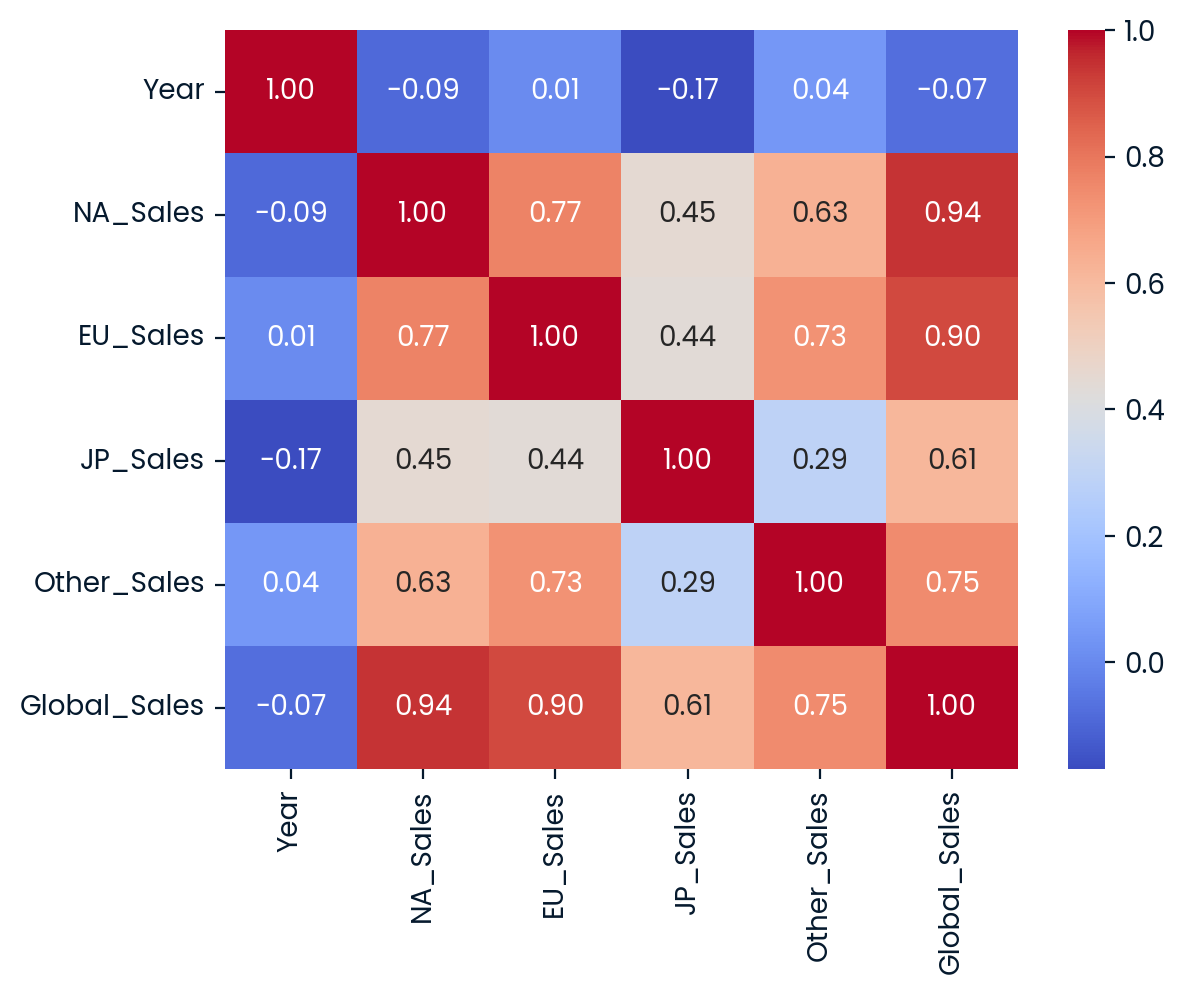

In [8]:
# Correlation matrix
corr_matrix = vgsales.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

I observe the relationship of the target, which would be the sales in Japan, with respect to the features.

In [9]:
corr_matrix.iloc[:,3]

Year           -0.169387
NA_Sales        0.451283
EU_Sales        0.436379
JP_Sales        1.000000
Other_Sales     0.290559
Global_Sales    0.612774
Name: JP_Sales, dtype: float64

Relevant data related to sales and how there is an expected relationship in sales. Global_Sales is not a good indicator because it is a sum of the Regional Sales. JP_Sales have a relation with the others sales, but isn't too strong alike NA_Sales or EU_Sales.

In [10]:
vgsales.sort_values(by=['Year','Genre','Platform'], ascending=[True,True,True],inplace=True)
vgsales.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
6319,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.0,0.00,0.27


In [11]:
#Number of unique sales per Title
print(vgsales['Name'].nunique())
#Total number of sales (records)
print(vgsales.shape[0])

11325
16291


In [12]:
vgsales[vgsales.duplicated(subset=['Name', 'Genre'], keep=False)].sort_values(by=['Name', 'Genre']).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
9320,007: Quantum of Solace,DS,2008.0,Action,Activision,0.11,0.01,0.00,0.01,0.14
14550,007: Quantum of Solace,PC,2008.0,Action,Activision,0.01,0.01,0.00,0.00,0.03
4501,007: Quantum of Solace,PS2,2008.0,Action,Activision,0.17,0.00,0.00,0.26,0.43
1741,007: Quantum of Solace,PS3,2008.0,Action,Activision,0.43,0.52,0.02,0.20,1.16
3040,007: Quantum of Solace,Wii,2008.0,Action,Activision,0.30,0.29,0.01,0.07,0.67
1275,007: Quantum of Solace,X360,2008.0,Action,Activision,0.82,0.52,0.01,0.14,1.49
1202,007: The World is not Enough,N64,2000.0,Action,Electronic Arts,1.13,0.38,0.02,0.03,1.55
2249,007: The World is not Enough,PS,2000.0,Action,Electronic Arts,0.51,0.35,0.00,0.06,0.92
15008,11eyes: CrossOver,X360,2009.0,Adventure,5pb,0.00,0.00,0.02,0.00,0.02


After counting the number of unique titles and the total number of registered titles, it becomes apparent that there are duplicates in the "Name" field. This is likely due to the distribution of the table, indicating that these duplicates are because games are released for different platforms.

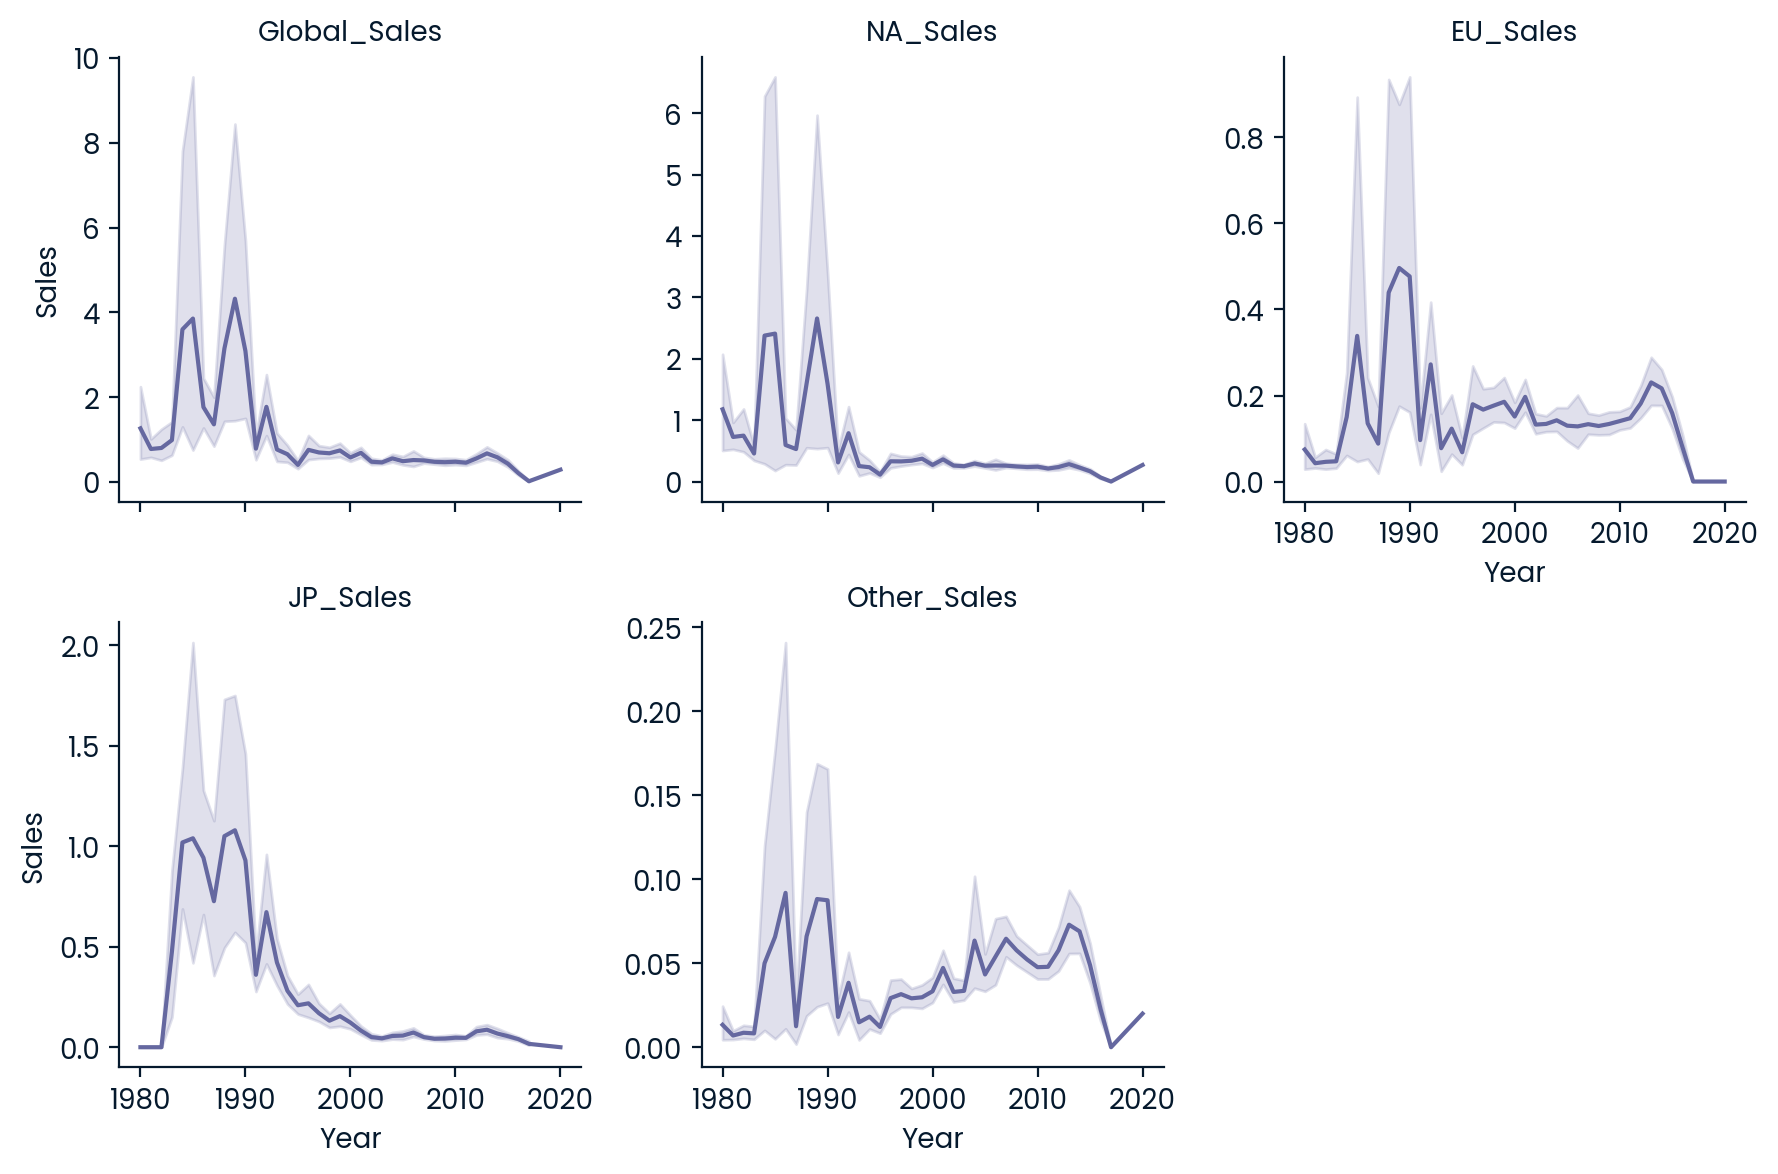

In [13]:
# Wide to long for seaborn
melted_vgsales = vgsales.melt(id_vars=['Year'], value_vars=['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                              var_name='Type_of_Sales', value_name='Sales')

# Set FacetGrid, 3 columns and share y False.
g = sns.FacetGrid(melted_vgsales, col='Type_of_Sales', col_wrap=3, sharey=False)

# Map lineplots using mean stimator
g.map(sns.lineplot, 'Year', 'Sales', estimator='mean')

# Titles
g.set_titles('{col_name}')

# Show
plt.show()


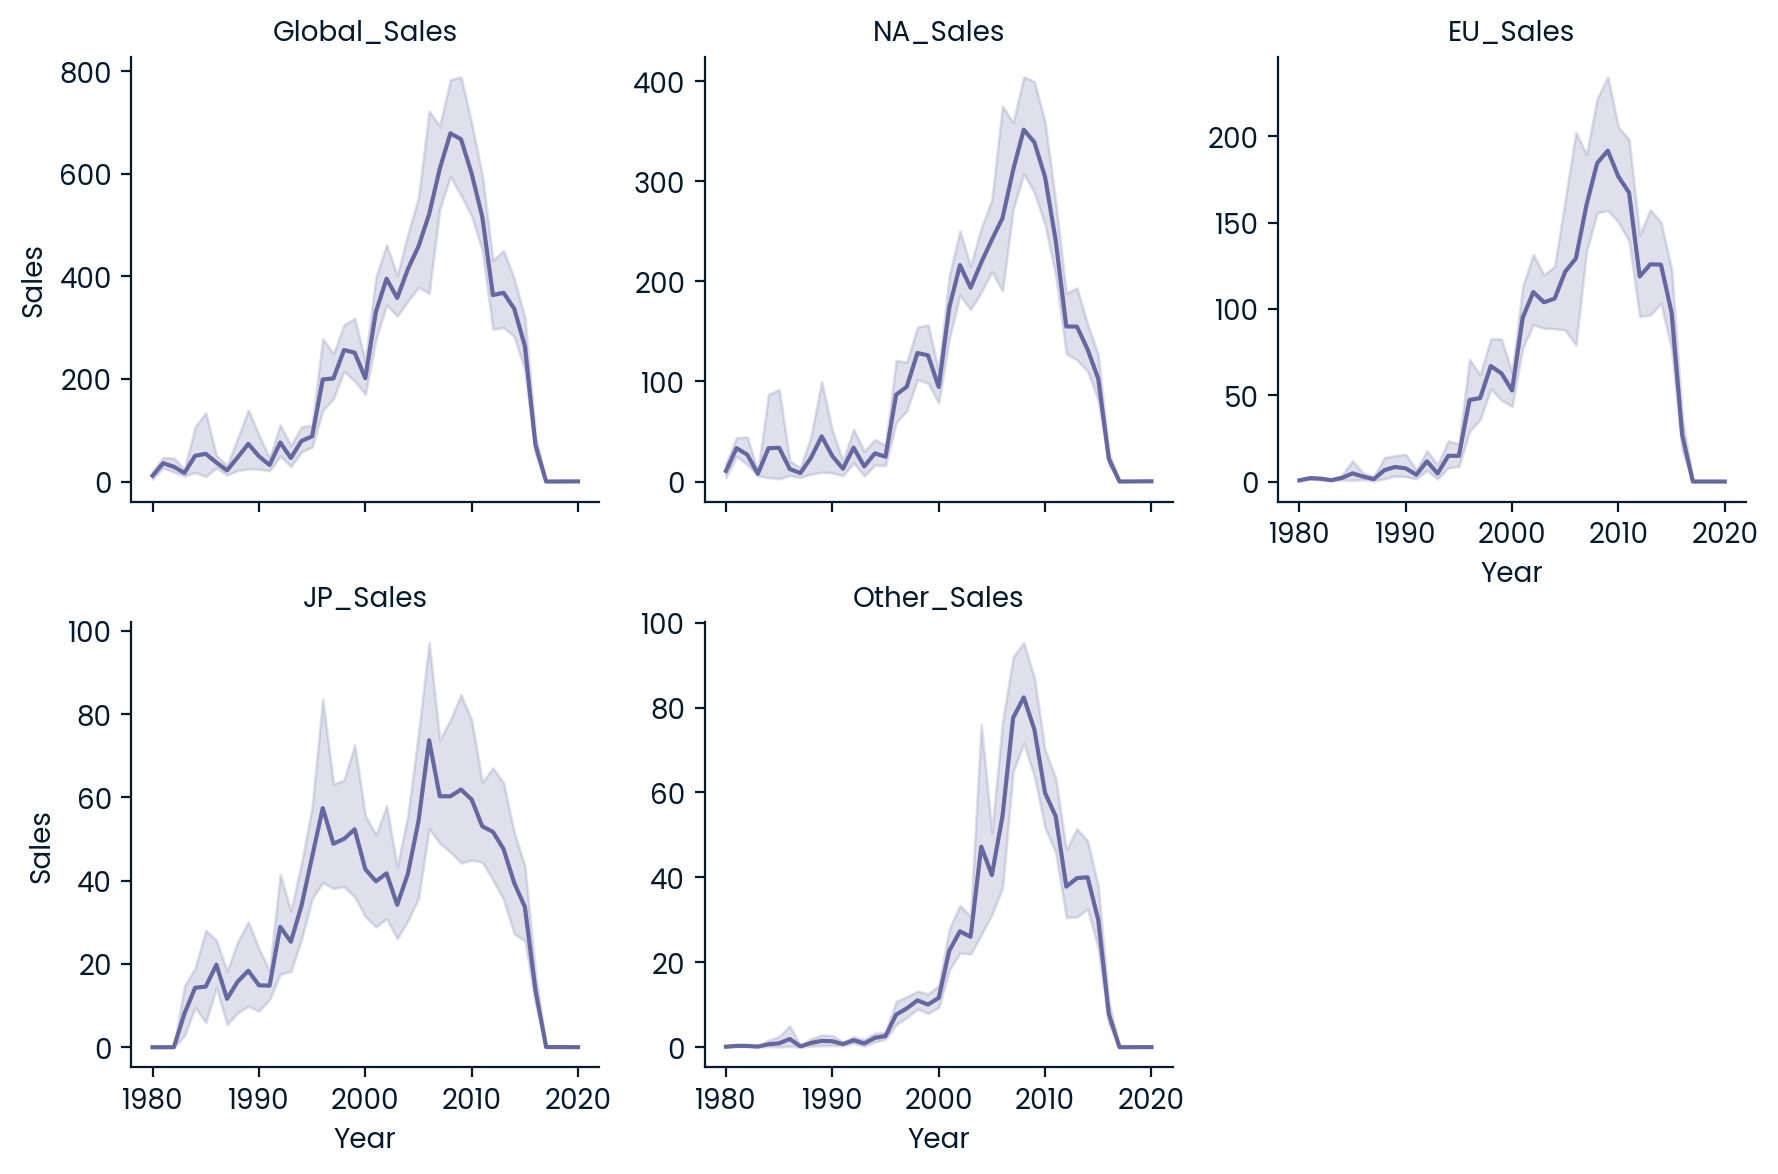

In [14]:
# Set FacetGrid, 3 columns and share y False.
g = sns.FacetGrid(melted_vgsales, col='Type_of_Sales', col_wrap=3, sharey=False)

# Map lineplots
g.map(sns.lineplot, 'Year', 'Sales', estimator='sum')

# Map lineplots using sum stimator
g.set_titles('{col_name}')

# Show
plt.show()

All regions show a similar behavior regarding sales on base their sum.

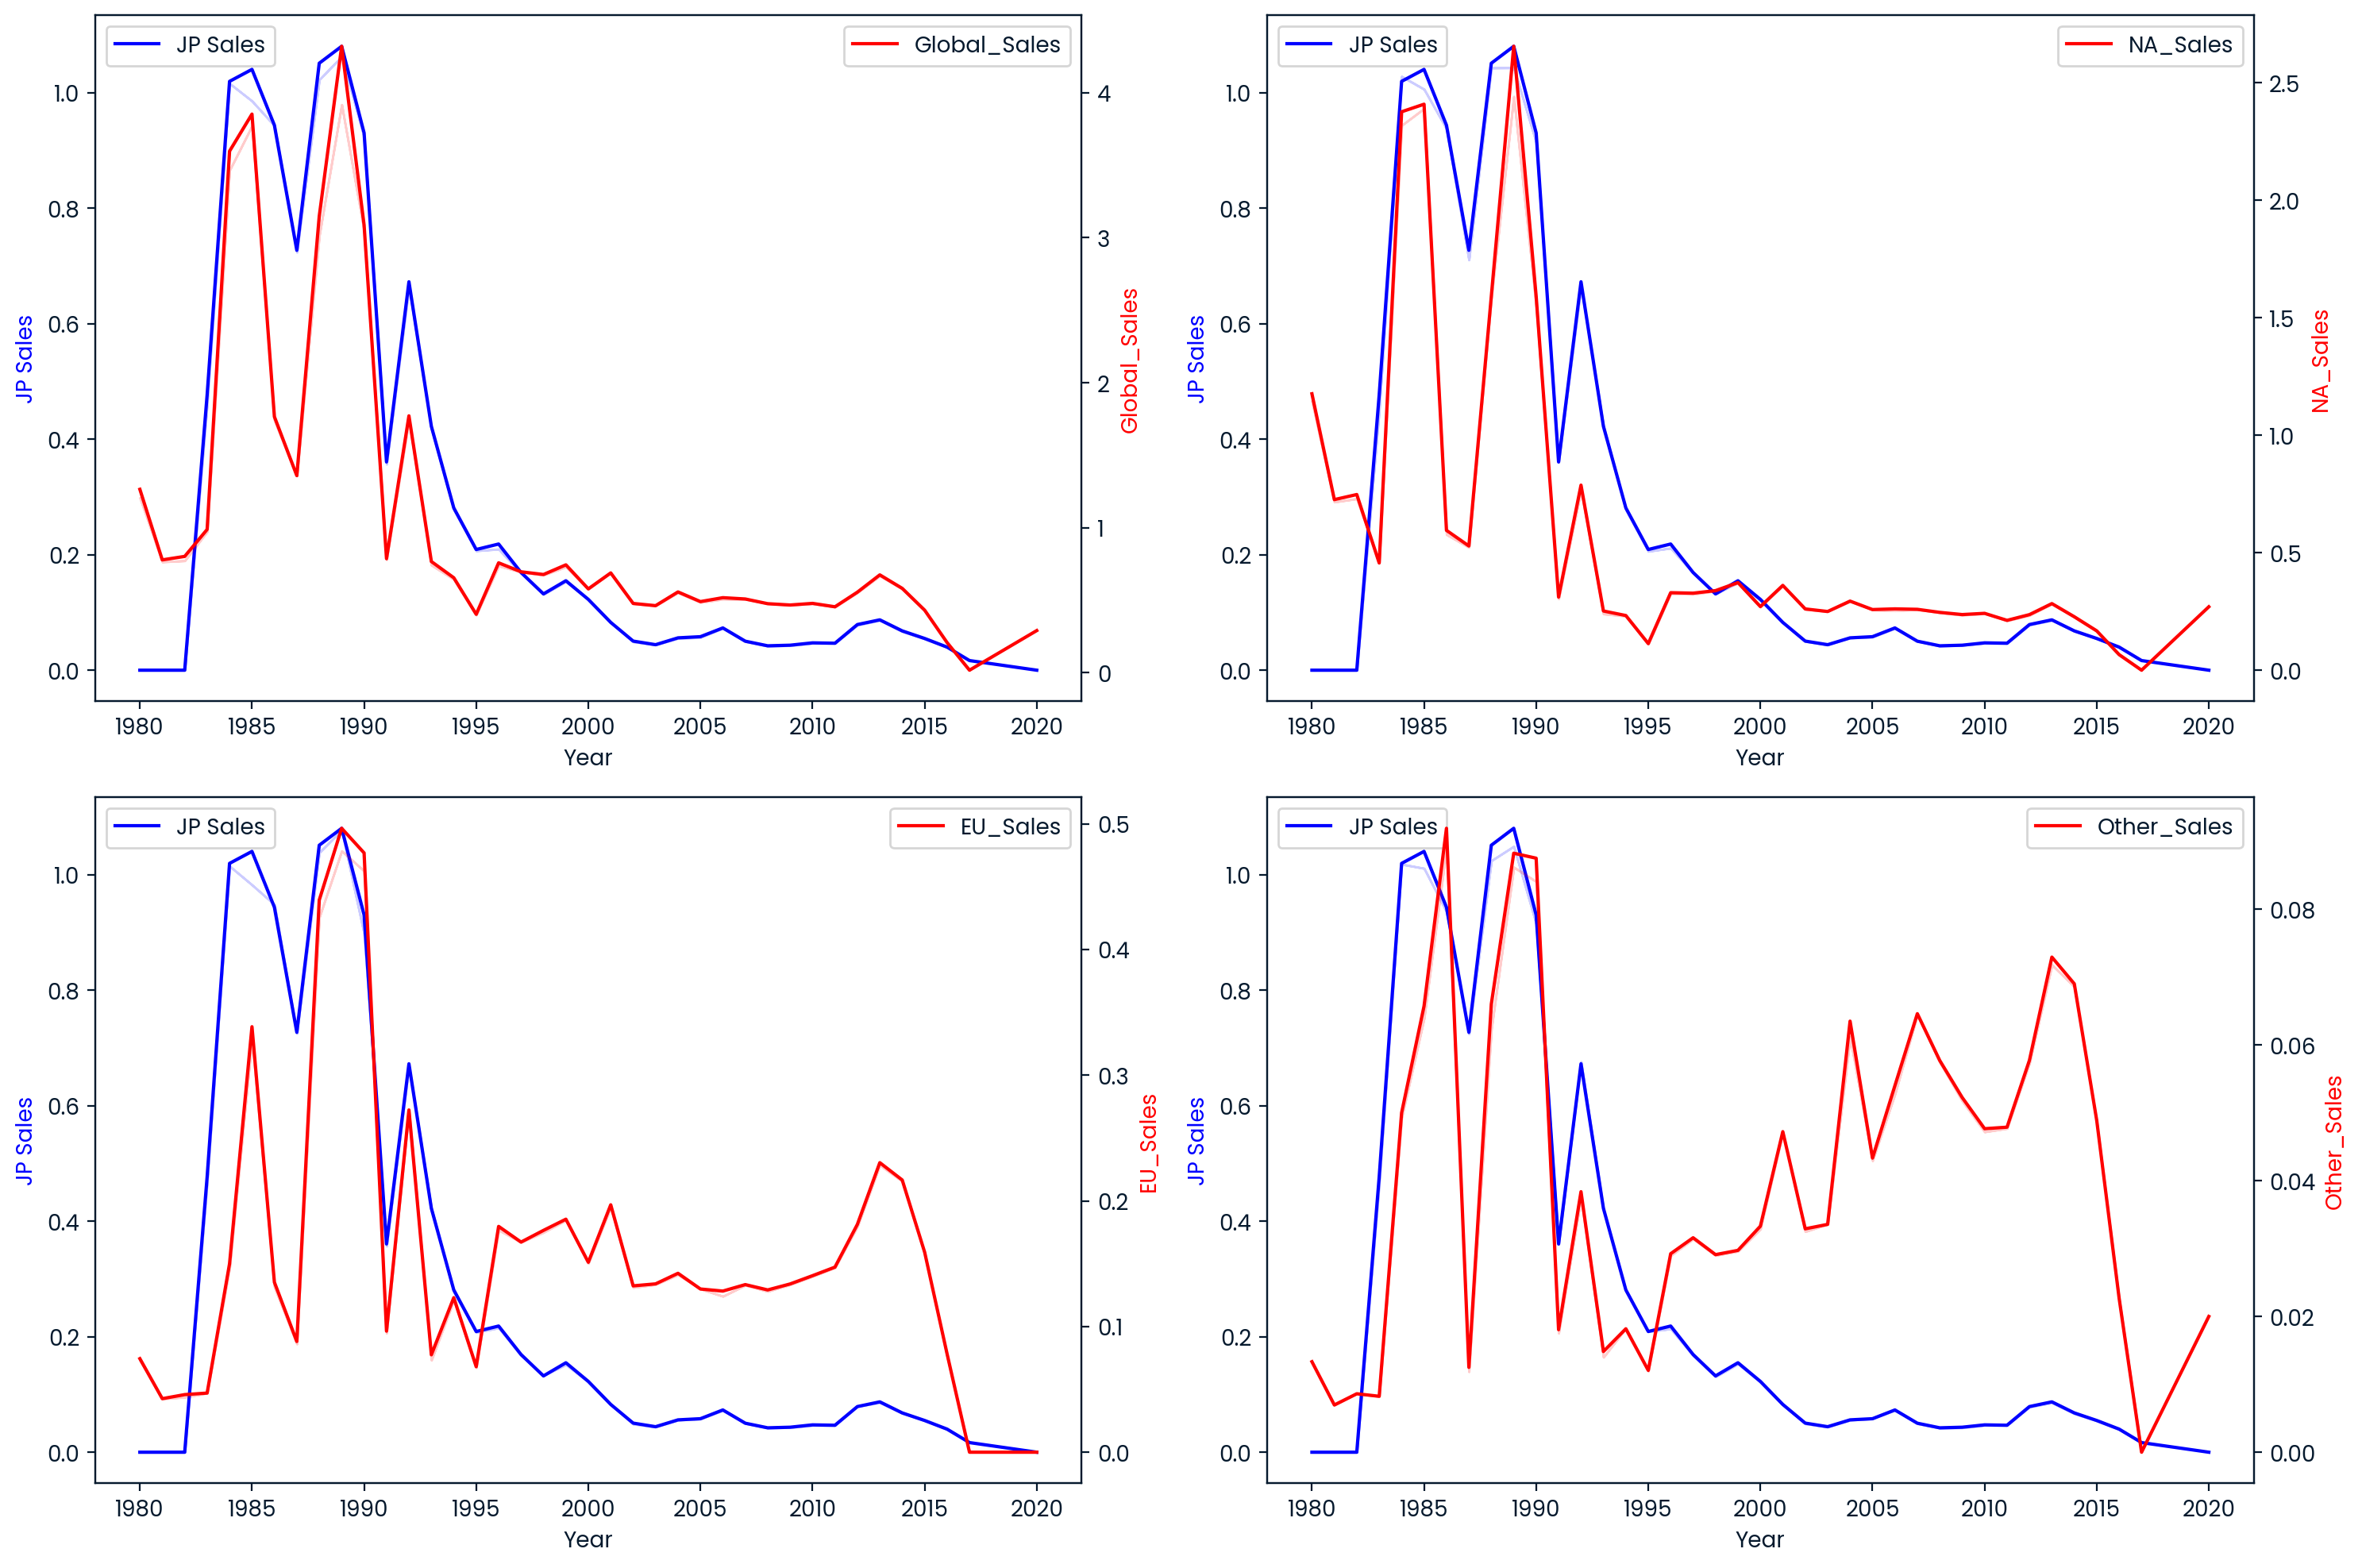

In [15]:

# Sales types to compare with JP_Sales
sales_types = ['Global_Sales', 'NA_Sales', 'EU_Sales', 'Other_Sales']

# Create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, sales_type in enumerate(sales_types):
    # Create first axis for JP_Sales
    ax1 = axes[i]
    sns.lineplot(data=vgsales, x='Year', y='JP_Sales', ax=ax1, color='b', label='JP Sales', ci=False)
    ax1.set_ylabel('JP Sales', color='b')

    # Create second axis for the other sales type
    ax2 = ax1.twinx()
    sns.lineplot(data=vgsales, x='Year', y=sales_type, ax=ax2, color='r', label=sales_type, ci=False)
    ax2.set_ylabel(f'{sales_type}', color='r')

    # Configure legend position
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

As we can observe in the graphs regarding Sales, there is a relationship in the trend regarding Global_Sales (but this is tricky, because Global_Sales includes JP_Sales ) and Na_Sales, with EU_Sales and Others_Sales is not so outstanding.

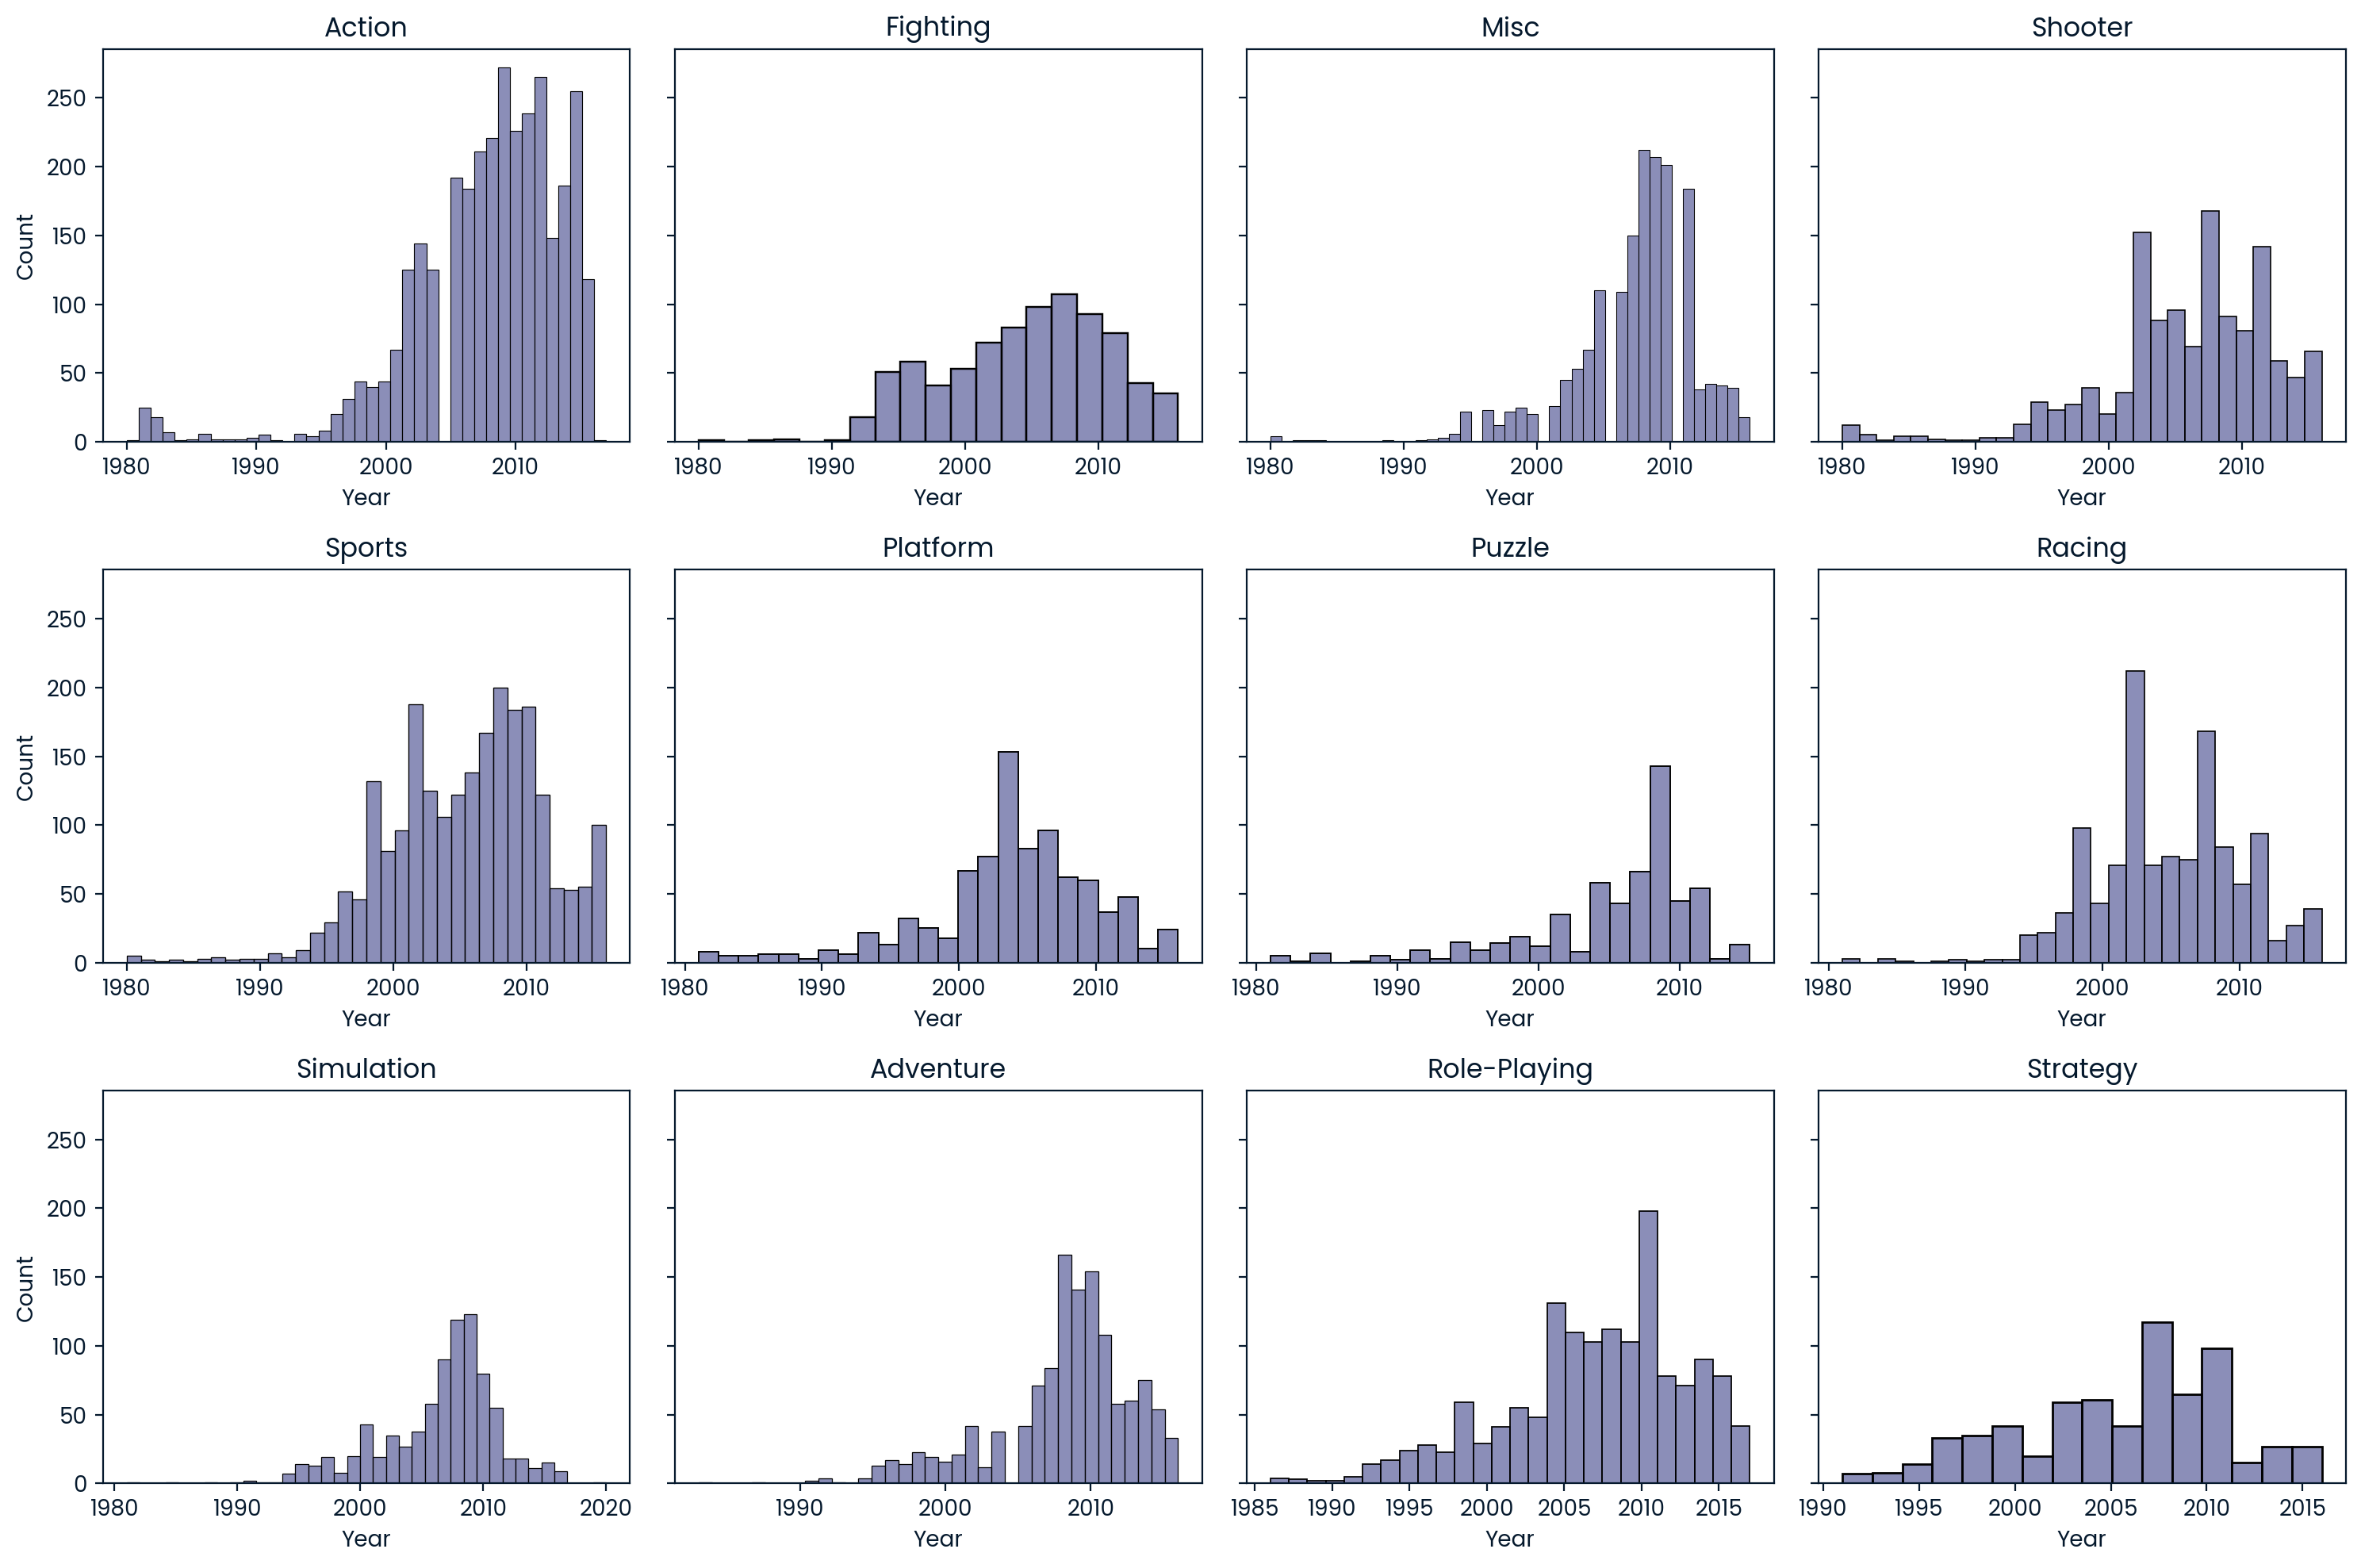

In [16]:
# Create a grid of subplots for each genre
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10),sharey=True)
axes = axes.flatten()

# Iterate over each genre and create a histogram for each one
for i, genre in enumerate(vgsales['Genre'].unique()):
    ax = axes[i]
    sns.histplot(data=vgsales[vgsales['Genre'] == genre], x='Year', ax=ax)
    ax.set_title(genre)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

As we can see, the Action genre typically maintains the highest number of sales. The peak of sales has already passed, and it occurred around the year 2000. After that, the number of sales began to decline. Let's evaluate this.

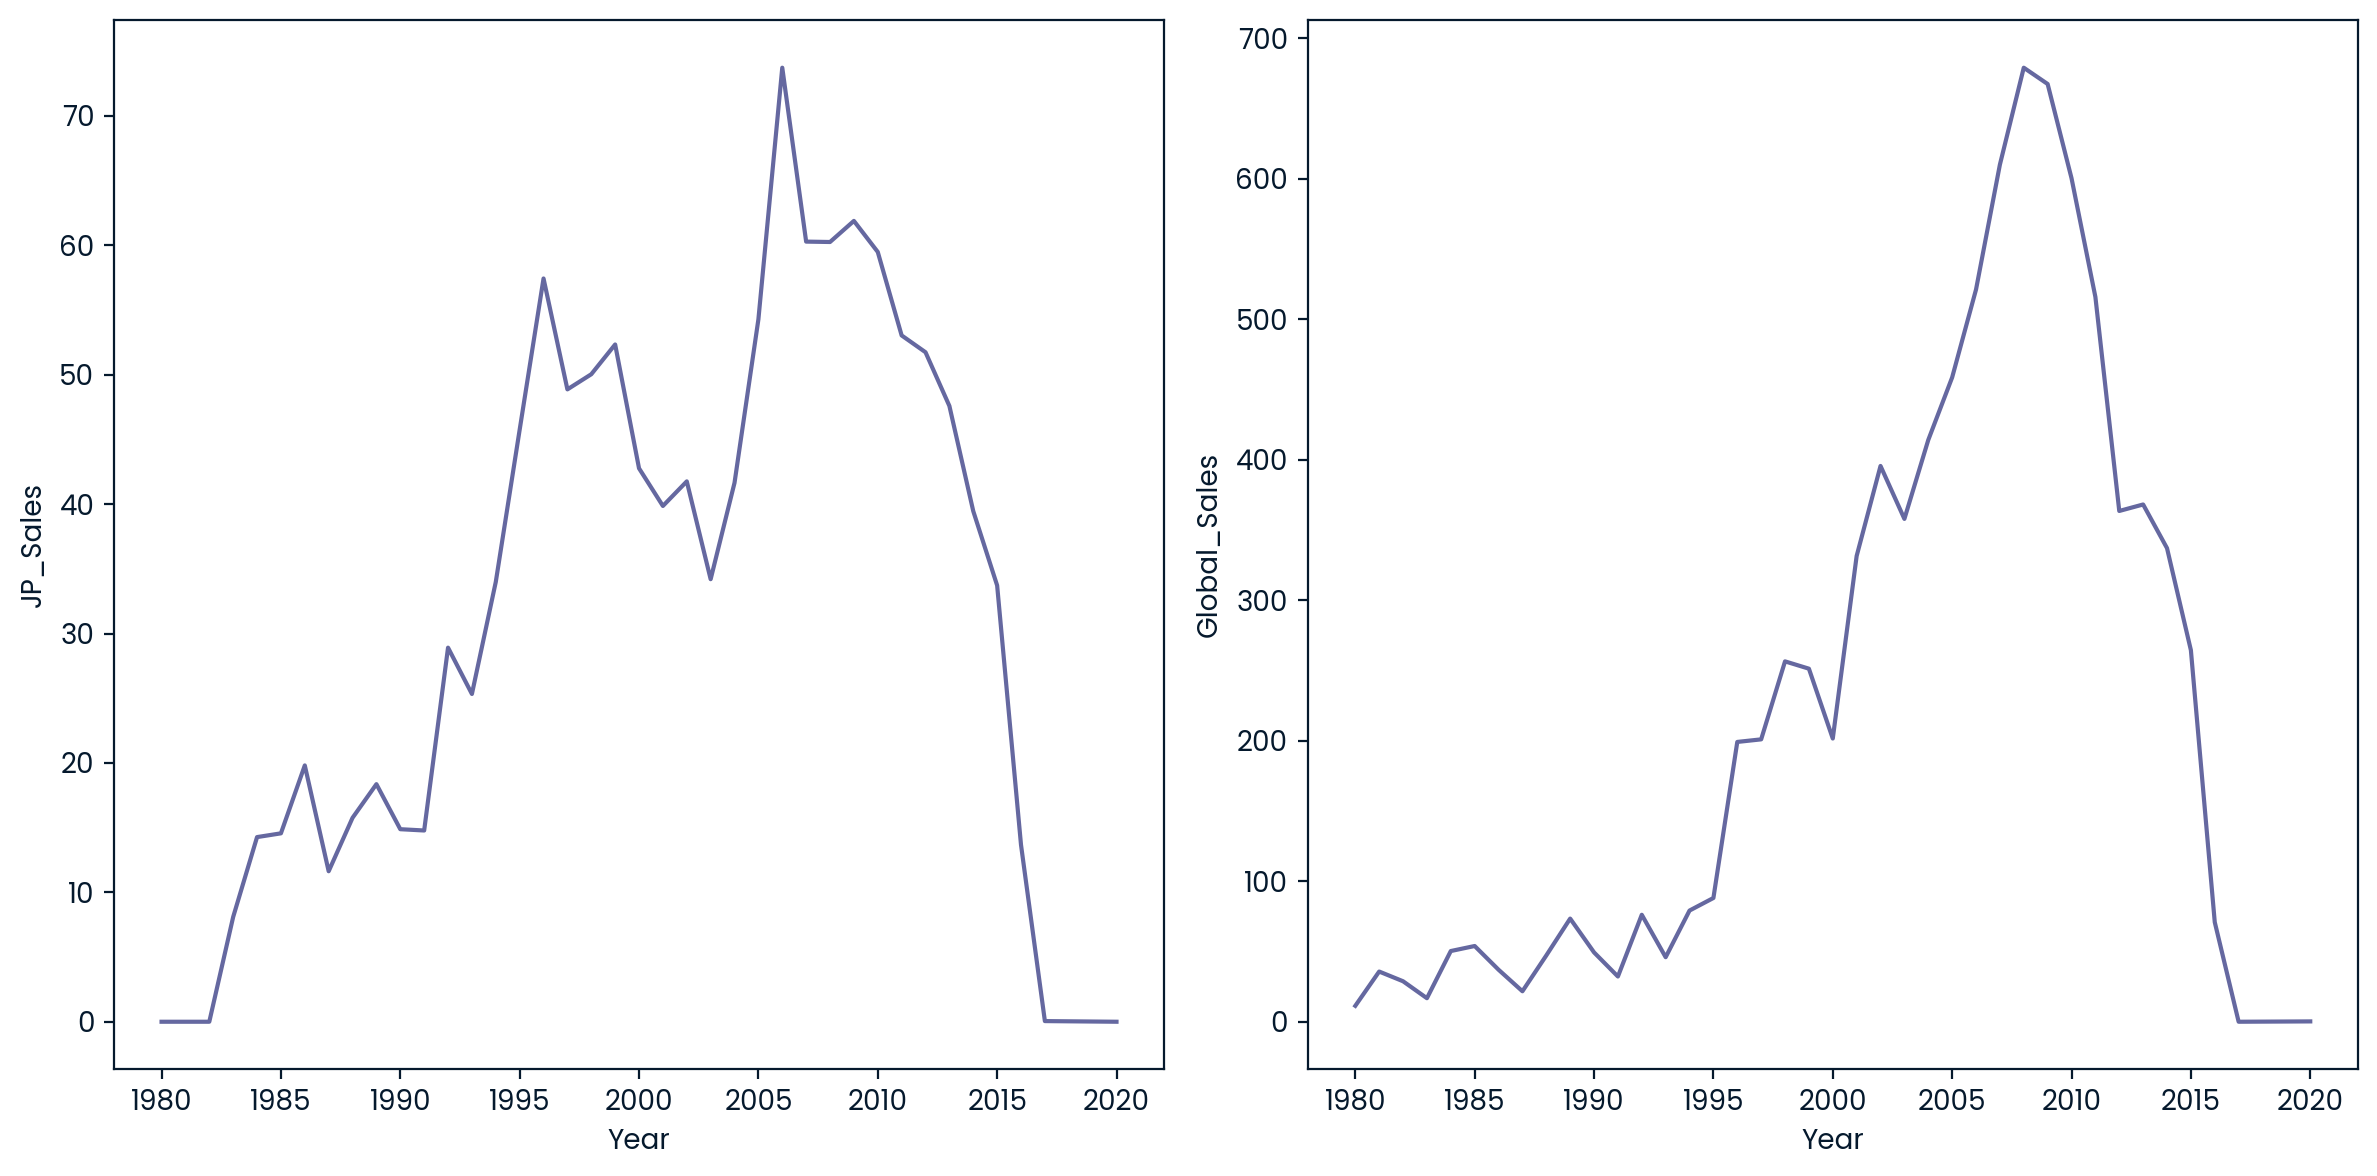

In [17]:
# Sales by year for Global and Japan
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
sns.lineplot(vgsales.groupby('Year')['JP_Sales'].sum().sort_values(),ax=ax1)
sns.lineplot(vgsales.groupby('Year')['Global_Sales'].sum().sort_values(), ax=ax2)
plt.tight_layout()

Indeed, an increase in the number of sales is observed between the years 1990 and 1995, reaching its peak between 2005 and 2010. Afterward, sales begin to decline, which may be due to the success of free-to-play games that typically record in-game purchases rather than sales of the title itself. Additionally, the decline may be influenced by sales of games for mobile devices or those that are cross-platform.

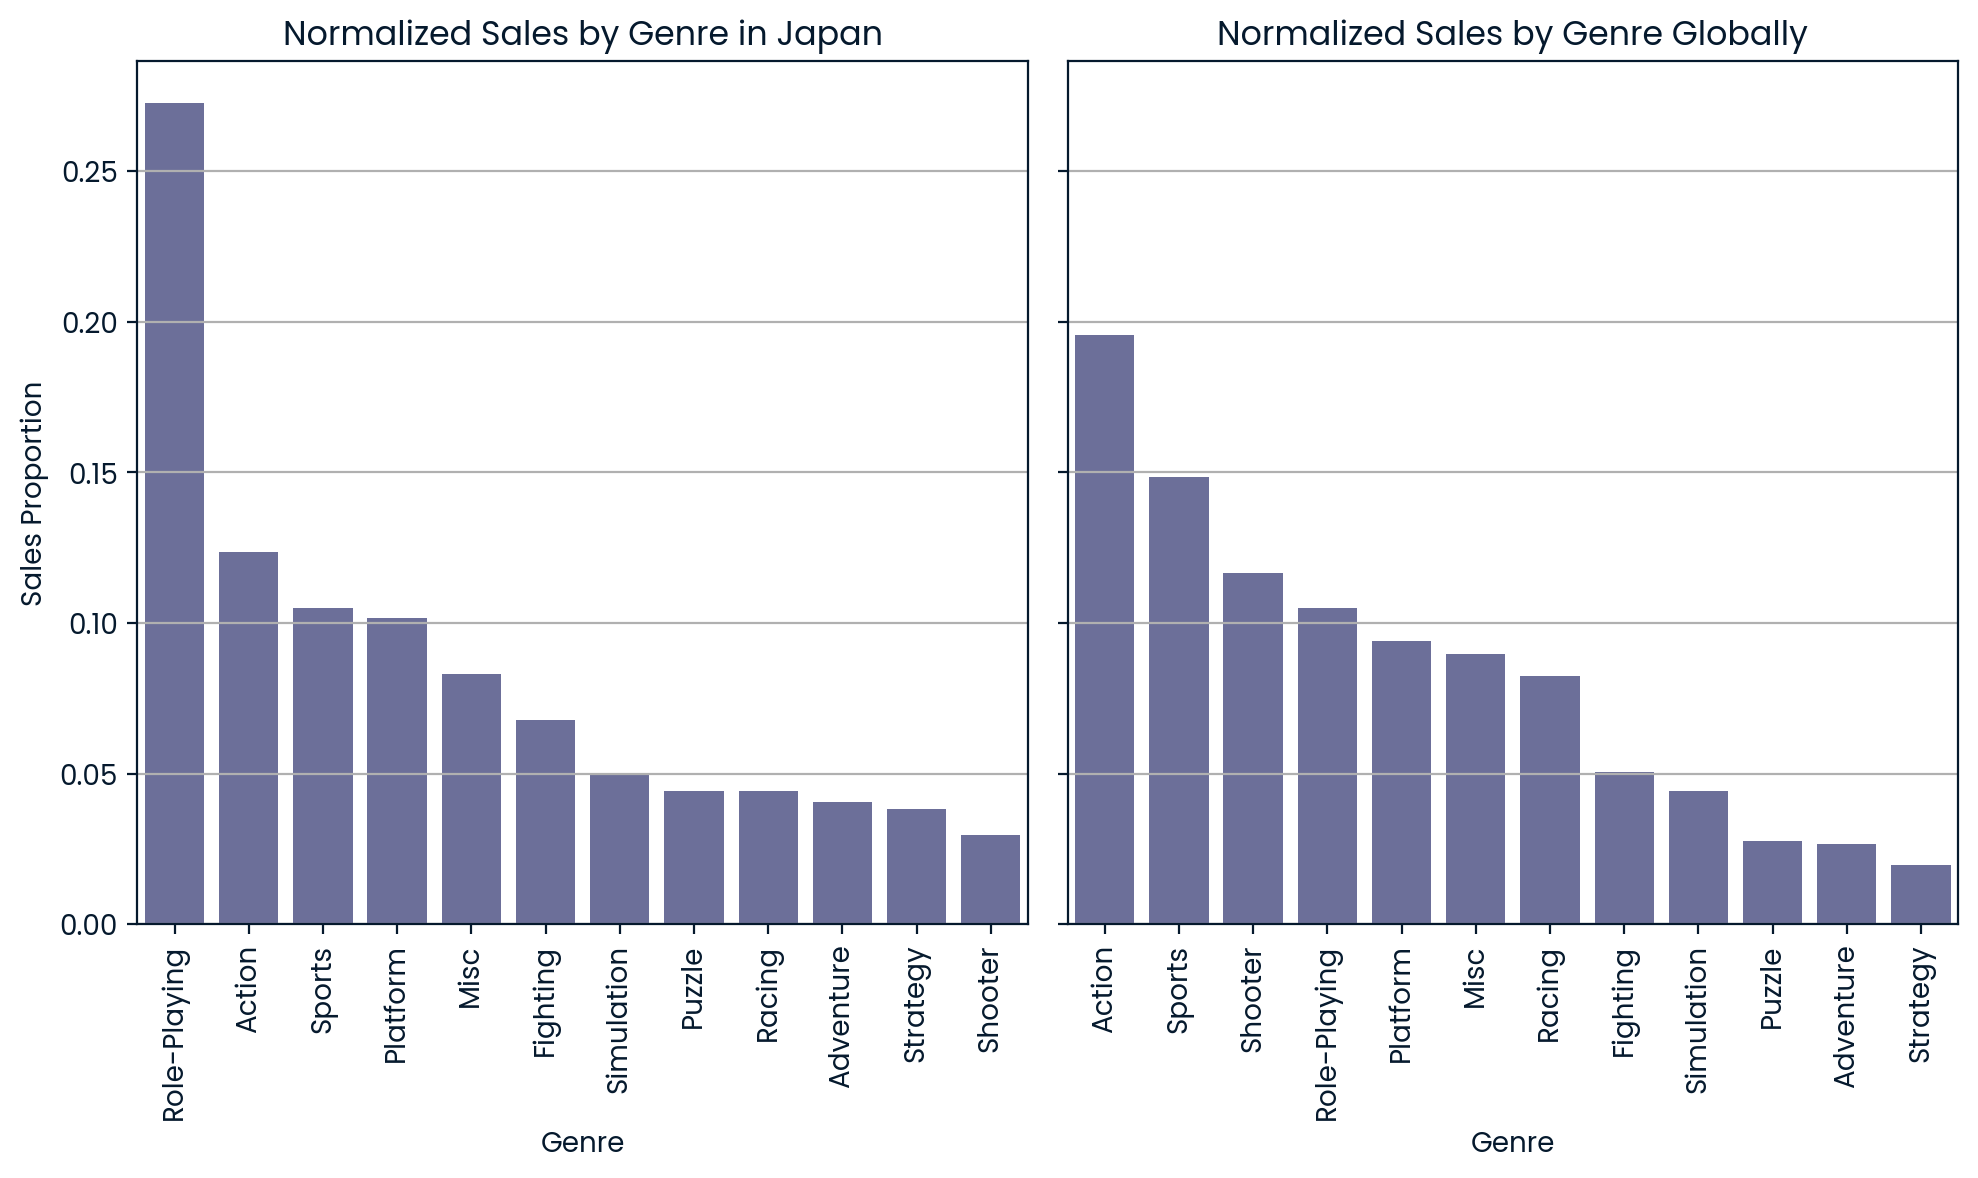

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate total sales by genre
genre_sales_jp = vgsales.groupby('Genre')['JP_Sales'].sum()
genre_sales_global = vgsales.groupby('Genre')['Global_Sales'].sum()

# Calculate total sales in Japan and globally
total_sales_jp = genre_sales_jp.sum()
total_sales_global = genre_sales_global.sum()

# Normalize sales by genre (dividing by total sales) and sort them
normalized_sales_jp = (genre_sales_jp / total_sales_jp).sort_values(ascending=False).reset_index()
normalized_sales_global = (genre_sales_global / total_sales_global).sort_values(ascending=False).reset_index()

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6),sharey = True)

# Plot for Japan Sales
sns.barplot(y='JP_Sales', x='Genre', data=normalized_sales_jp, ax=ax1, order=normalized_sales_jp['Genre'])
ax1.set_title('Normalized Sales by Genre in Japan')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Sales Proportion')
ax1.grid(True, axis='y')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Plot for Global Sales
sns.barplot(y='Global_Sales', x='Genre', data=normalized_sales_global, ax=ax2, order=normalized_sales_global['Genre'])
ax2.set_title('Normalized Sales by Genre Globally')
ax2.set_xlabel('Genre')
ax2.set_ylabel('Sales Proportion')
ax2.grid(True, axis='y')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()



The genre that sold the most was Action, followed by Sports in terms of global sales. However, in Japan, it seems that the most popular genre is Role-Playing, followed by Action.

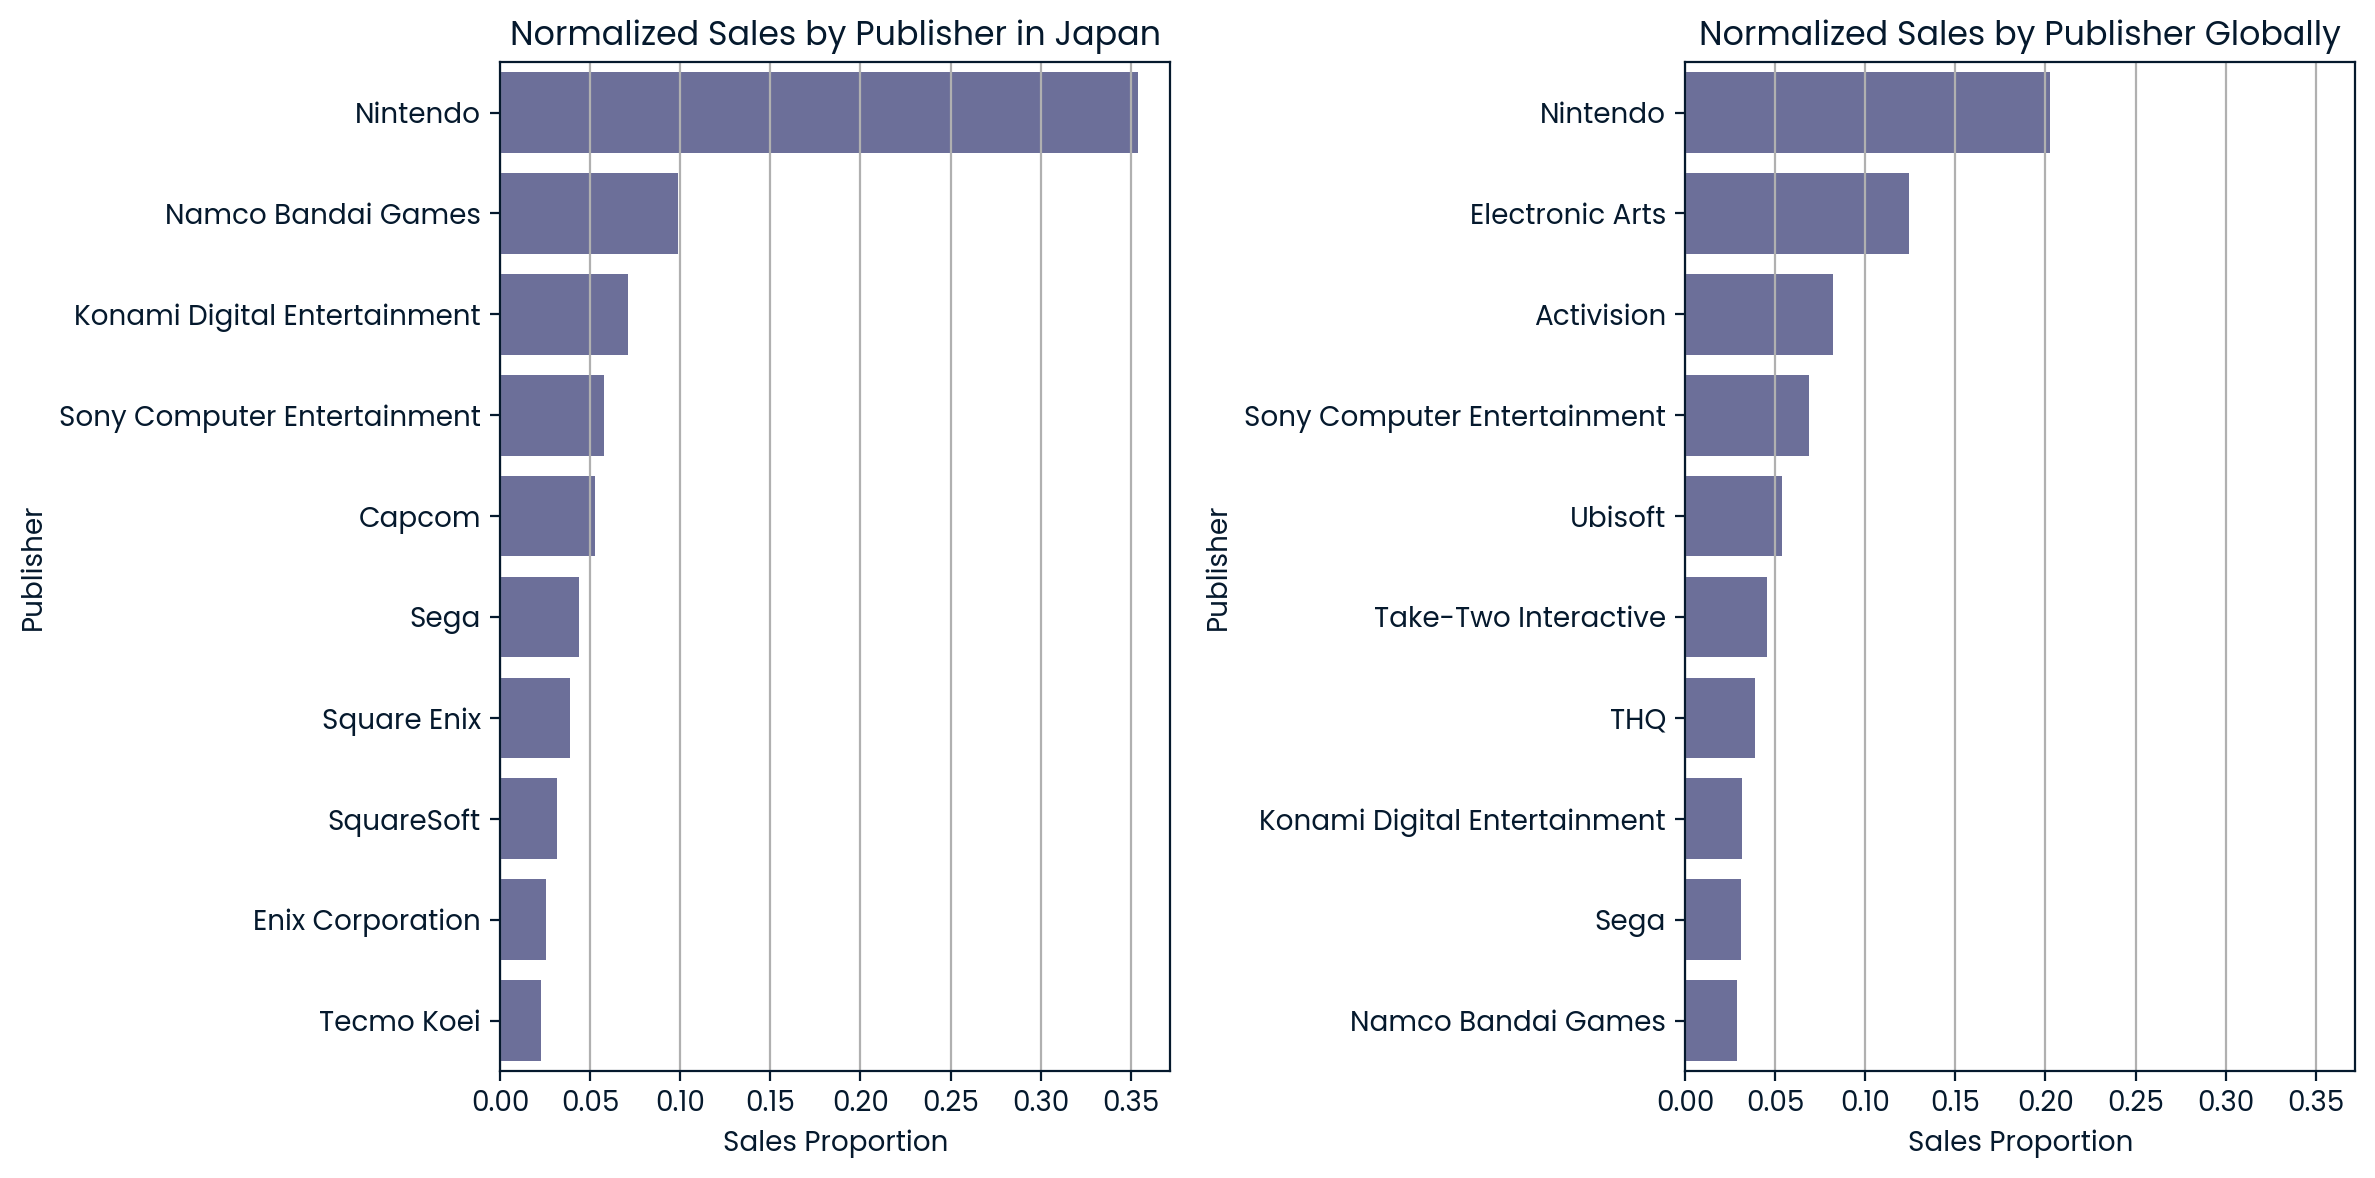

In [19]:
# Calculate total sales by Publisher
publisher_sales_jp = vgsales.groupby('Publisher')['JP_Sales'].sum()
publisher_sales_global = vgsales.groupby('Publisher')['Global_Sales'].sum()

# Calculate total sales in Japan and globally
total_sales_jp = publisher_sales_jp.sum()
total_sales_global = publisher_sales_global.sum()

# Normalize sales by Publisher (dividing by total sales) and get top 10
normalized_sales_jp = (publisher_sales_jp / total_sales_jp).sort_values(ascending=False).head(10)
normalized_sales_global = (publisher_sales_global / total_sales_global).sort_values(ascending=False).head(10)

# Convert the Series to DataFrame for easy plotting
normalized_sales_jp_df = normalized_sales_jp.reset_index()
normalized_sales_global_df = normalized_sales_global.reset_index()

# Remove unused categories from the 'Publisher' column in the filtered DataFrames
normalized_sales_jp_df['Publisher'] = normalized_sales_jp_df['Publisher'].cat.remove_unused_categories()
normalized_sales_global_df['Publisher'] = normalized_sales_global_df['Publisher'].cat.remove_unused_categories()

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex = True)

# Plot for Japan Sales
# Ensure the order is maintained as per the top 10 ranking
sns.barplot(x='JP_Sales', y='Publisher', data=normalized_sales_jp_df, ax=ax1, order=normalized_sales_jp_df['Publisher'])
ax1.set_title('Normalized Sales by Publisher in Japan')
ax1.set_xlabel('Sales Proportion')
ax1.grid(True, axis='x')

# Plot for Global Sales
# Ensure the order is maintained as per the top 10 ranking
sns.barplot(x='Global_Sales', y='Publisher', data=normalized_sales_global_df, ax=ax2, order=normalized_sales_global_df['Publisher'])
ax2.set_title('Normalized Sales by Publisher Globally')
ax2.set_xlabel('Sales Proportion')
ax2.grid(True, axis='x')

plt.tight_layout()
plt.show()


As expected, in Japan, companies with their headquarters there lead in sales, such as Nintendo or Namco. This may also have a relationship with the consoles to which the video games are targeted. However, the global sales landscape is different. While Nintendo leads, the difference compared to others is not as steep, and for the following tiers, Japanese companies are displaced by another publisher.

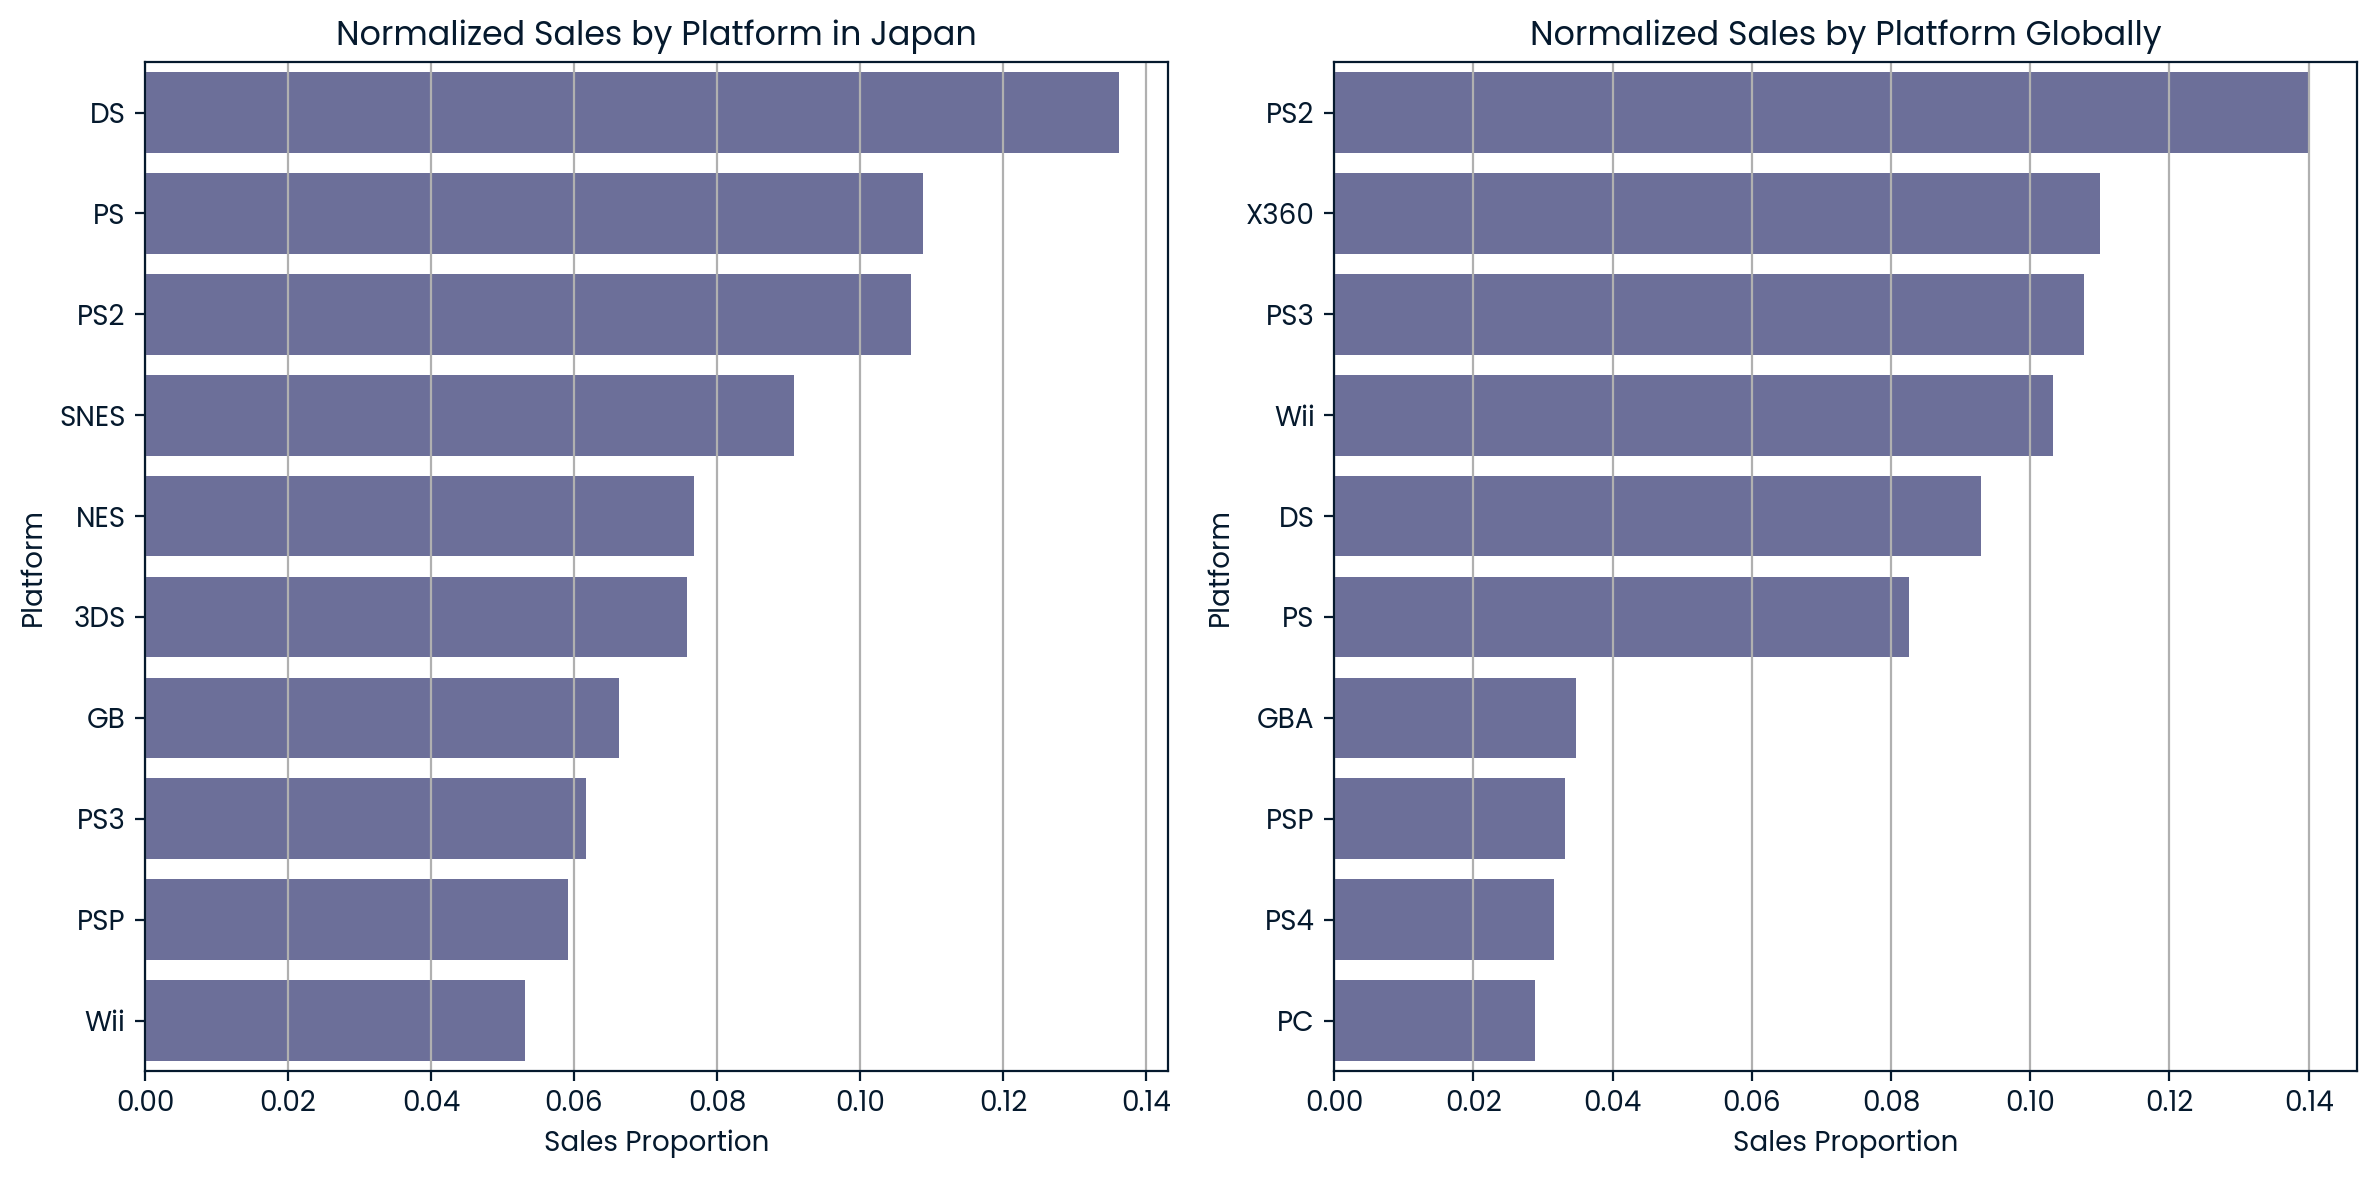

In [20]:
# Calculate total sales by Platform
platform_sales_jp = vgsales.groupby('Platform')['JP_Sales'].sum()
platform_sales_global = vgsales.groupby('Platform')['Global_Sales'].sum()

# Calculate total sales in Japan and globally
total_sales_jp = platform_sales_jp.sum()
total_sales_global = platform_sales_global.sum()

# Normalize sales by Platform (dividing by total sales) and sort them
normalized_sales_jp = (platform_sales_jp / total_sales_jp).sort_values(ascending=False).head(10)
normalized_sales_global = (platform_sales_global / total_sales_global).sort_values(ascending=False).head(10)

# Convert the Series to DataFrame for easy plotting
normalized_sales_jp_df = normalized_sales_jp.reset_index()
normalized_sales_global_df = normalized_sales_global.reset_index()

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Japan Sales
# Ensure the order is maintained as per the top 10 ranking
sns.barplot(x='JP_Sales', y='Platform', data=normalized_sales_jp_df, ax=ax1, order=normalized_sales_jp_df['Platform'])
ax1.set_title('Normalized Sales by Platform in Japan')
ax1.set_xlabel('Sales Proportion')
ax1.grid(True, axis='x')

# Plot for Global Sales
# Ensure the order is maintained as per the top 10 ranking
sns.barplot(x='Global_Sales', y='Platform', data=normalized_sales_global_df, ax=ax2, order=normalized_sales_global_df['Platform'])
ax2.set_title('Normalized Sales by Platform Globally')
ax2.set_xlabel('Sales Proportion')
ax2.grid(True, axis='x')

plt.tight_layout()
plt.show()



As expected, in Japan, the platform that led in sales is the DS, followed by the PS. However, globally, the PS2 takes the lead, followed by the X360. It's also worth noting that in Japan, the X360 was not as popular.

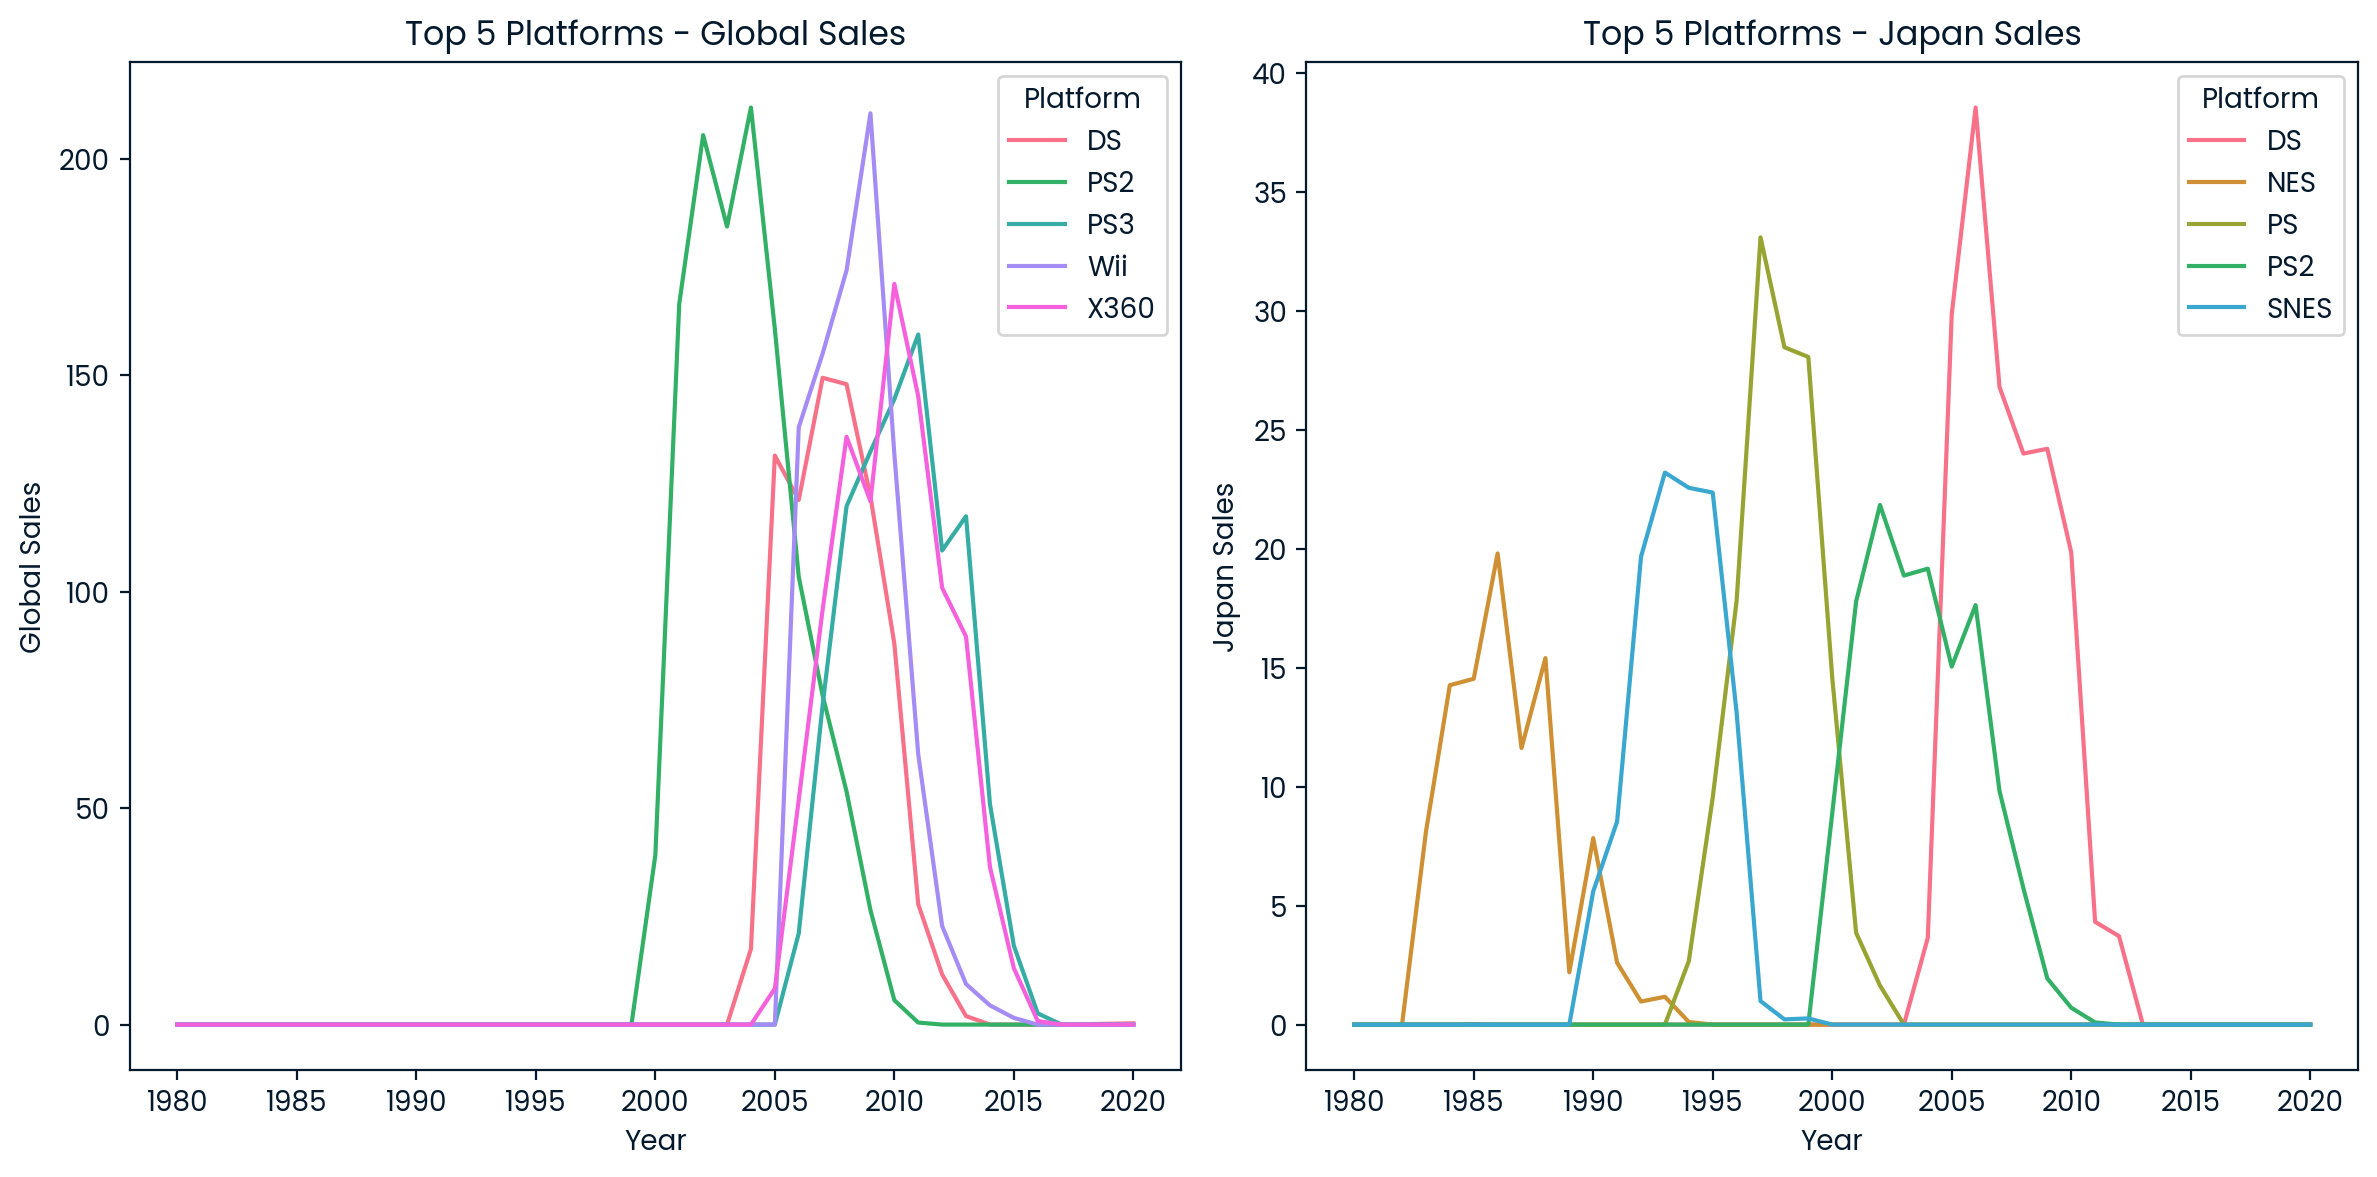

In [21]:
# Group the data by Platform and Year, and calculate the sum of Global Sales and Japan Sales
sales_by_platform_year = vgsales.groupby(['Year','Platform']).agg({'Global_Sales': 'sum', 'JP_Sales': 'sum'}).reset_index()

# Get the top 5 platforms by Global Sales
top5_platforms_global = sales_by_platform_year.groupby('Platform')['Global_Sales'].sum().nlargest(5).index

# Get the top 5 platforms by Japan Sales
top5_platforms_japan = sales_by_platform_year.groupby('Platform')['JP_Sales'].sum().nlargest(5).index

# Combine the top platforms and create a unique list
unique_platforms = top5_platforms_global.union(top5_platforms_japan)

# Create a custom color palette
palette = sns.color_palette("husl", len(unique_platforms))
color_map = dict(zip(unique_platforms, palette))

# Filter the data for the top 5 platforms by Global Sales and Japan Sales
filtered_sales_global = sales_by_platform_year[sales_by_platform_year['Platform'].isin(top5_platforms_global)]
filtered_sales_japan = sales_by_platform_year[sales_by_platform_year['Platform'].isin(top5_platforms_japan)]

# Remove unused categories from the 'Platform' column in the filtered DataFrames
filtered_sales_global['Platform'] = filtered_sales_global['Platform'].cat.remove_unused_categories()
filtered_sales_japan['Platform'] = filtered_sales_japan['Platform'].cat.remove_unused_categories()

# Create line plots for Global Sales and Japan Sales with custom color palette
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Global Sales
sns.lineplot(data=filtered_sales_global, x='Year', y='Global_Sales', hue='Platform', palette=color_map, ax=ax1)
ax1.set_title('Top 5 Platforms - Global Sales')
ax1.set_ylabel('Global Sales')

# Plot for Japan Sales
sns.lineplot(data=filtered_sales_japan, x='Year', y='JP_Sales', hue='Platform', palette=color_map, ax=ax2)
ax2.set_title('Top 5 Platforms - Japan Sales')
ax2.set_ylabel('Japan Sales')

plt.tight_layout()
plt.show()


In the graphics, another noteworthy aspect to consider is the duration of availability of the consoles, as several have been discontinued. As anticipated (as shown in the top chart), consoles typically experience a peak in sales shortly after their launch and then decline as they are phased out. The graph also reveals something unusual: the DS console shows records before its actual release year (2004) and even after its discontinuation in 2011 (likely is a mistake). This could introduce additional bias when evaluating the sales prediction model in Japan.

In [22]:
# A quick view on a possible mistake
vgsales.query('(Year < 2004 or Year > 2011)  and Platform == "DS"')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
15870,Strongest Tokyo University Shogi DS,DS,1985.0,Action,Mycom,0.00,0.00,0.02,0.00,0.02
2679,LEGO Batman 2: DC Super Heroes,DS,2012.0,Action,Warner Bros. Interactive Entertainment,0.43,0.27,0.00,0.06,0.77
7477,The Amazing Spider-Man (Console Version),DS,2012.0,Action,Activision,0.15,0.04,0.00,0.01,0.21
8633,LEGO The Lord of the Rings,DS,2012.0,Action,Warner Bros. Interactive Entertainment,0.00,0.14,0.00,0.02,0.16
10591,All Kamen Rider: Rider Generation 2,DS,2012.0,Action,Namco Bandai Games,0.00,0.00,0.10,0.00,0.10
13130,Detective Conan: Prelude from the Past,DS,2012.0,Action,Namco Bandai Games,0.00,0.00,0.05,0.00,0.05
13732,GoGo's Crazy Bones,DS,2012.0,Action,GameMill Entertainment,0.00,0.04,0.00,0.00,0.04
13903,Tokumei Sentai Go-Busters,DS,2012.0,Action,Namco Bandai Games,0.00,0.00,0.04,0.00,0.04
14684,Secrets of the Titanic,DS,2012.0,Action,Avanquest Software,0.00,0.02,0.00,0.00,0.03


In [23]:
# A quick view on a possible mistake
vgsales.query('Year > 1995  and Platform == "SNES"')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
8428,Street Fighter Alpha 2,SNES,1996.0,Fighting,Nintendo,0.00,0.00,0.17,0.00,0.17
5683,Momotarou Dentetsu Happy,SNES,1996.0,Misc,Hudson Soft,0.00,0.00,0.32,0.00,0.32
7759,Parlor! Mini 4,SNES,1996.0,Misc,Nippon Telenet,0.00,0.00,0.19,0.00,0.19
11640,Sound Novel Tsukuru,SNES,1996.0,Misc,ASCII Entertainment,0.00,0.00,0.08,0.00,0.08
12219,Parlor! Mini 2,SNES,1996.0,Misc,Nippon Telenet,0.00,0.00,0.07,0.00,0.07
14359,Nishijin Pachinko Monogatari 2,SNES,1996.0,Misc,KSS,0.00,0.00,0.03,0.00,0.03
373,Donkey Kong Country 3: Dixie Kong's Double Tro...,SNES,1996.0,Platform,Nintendo,1.17,0.50,1.75,0.08,3.51
1338,Kirby Super Star,SNES,1996.0,Platform,Nintendo,0.26,0.07,1.09,0.02,1.44
4452,Super Bomberman 4,SNES,1996.0,Puzzle,Hudson Soft,0.00,0.00,0.44,0.00,0.44


In [24]:
# Drop of inusual record
vgsales.drop(vgsales[(vgsales['Platform']=='DS') & (vgsales['Year']==1985)].index, inplace=True)

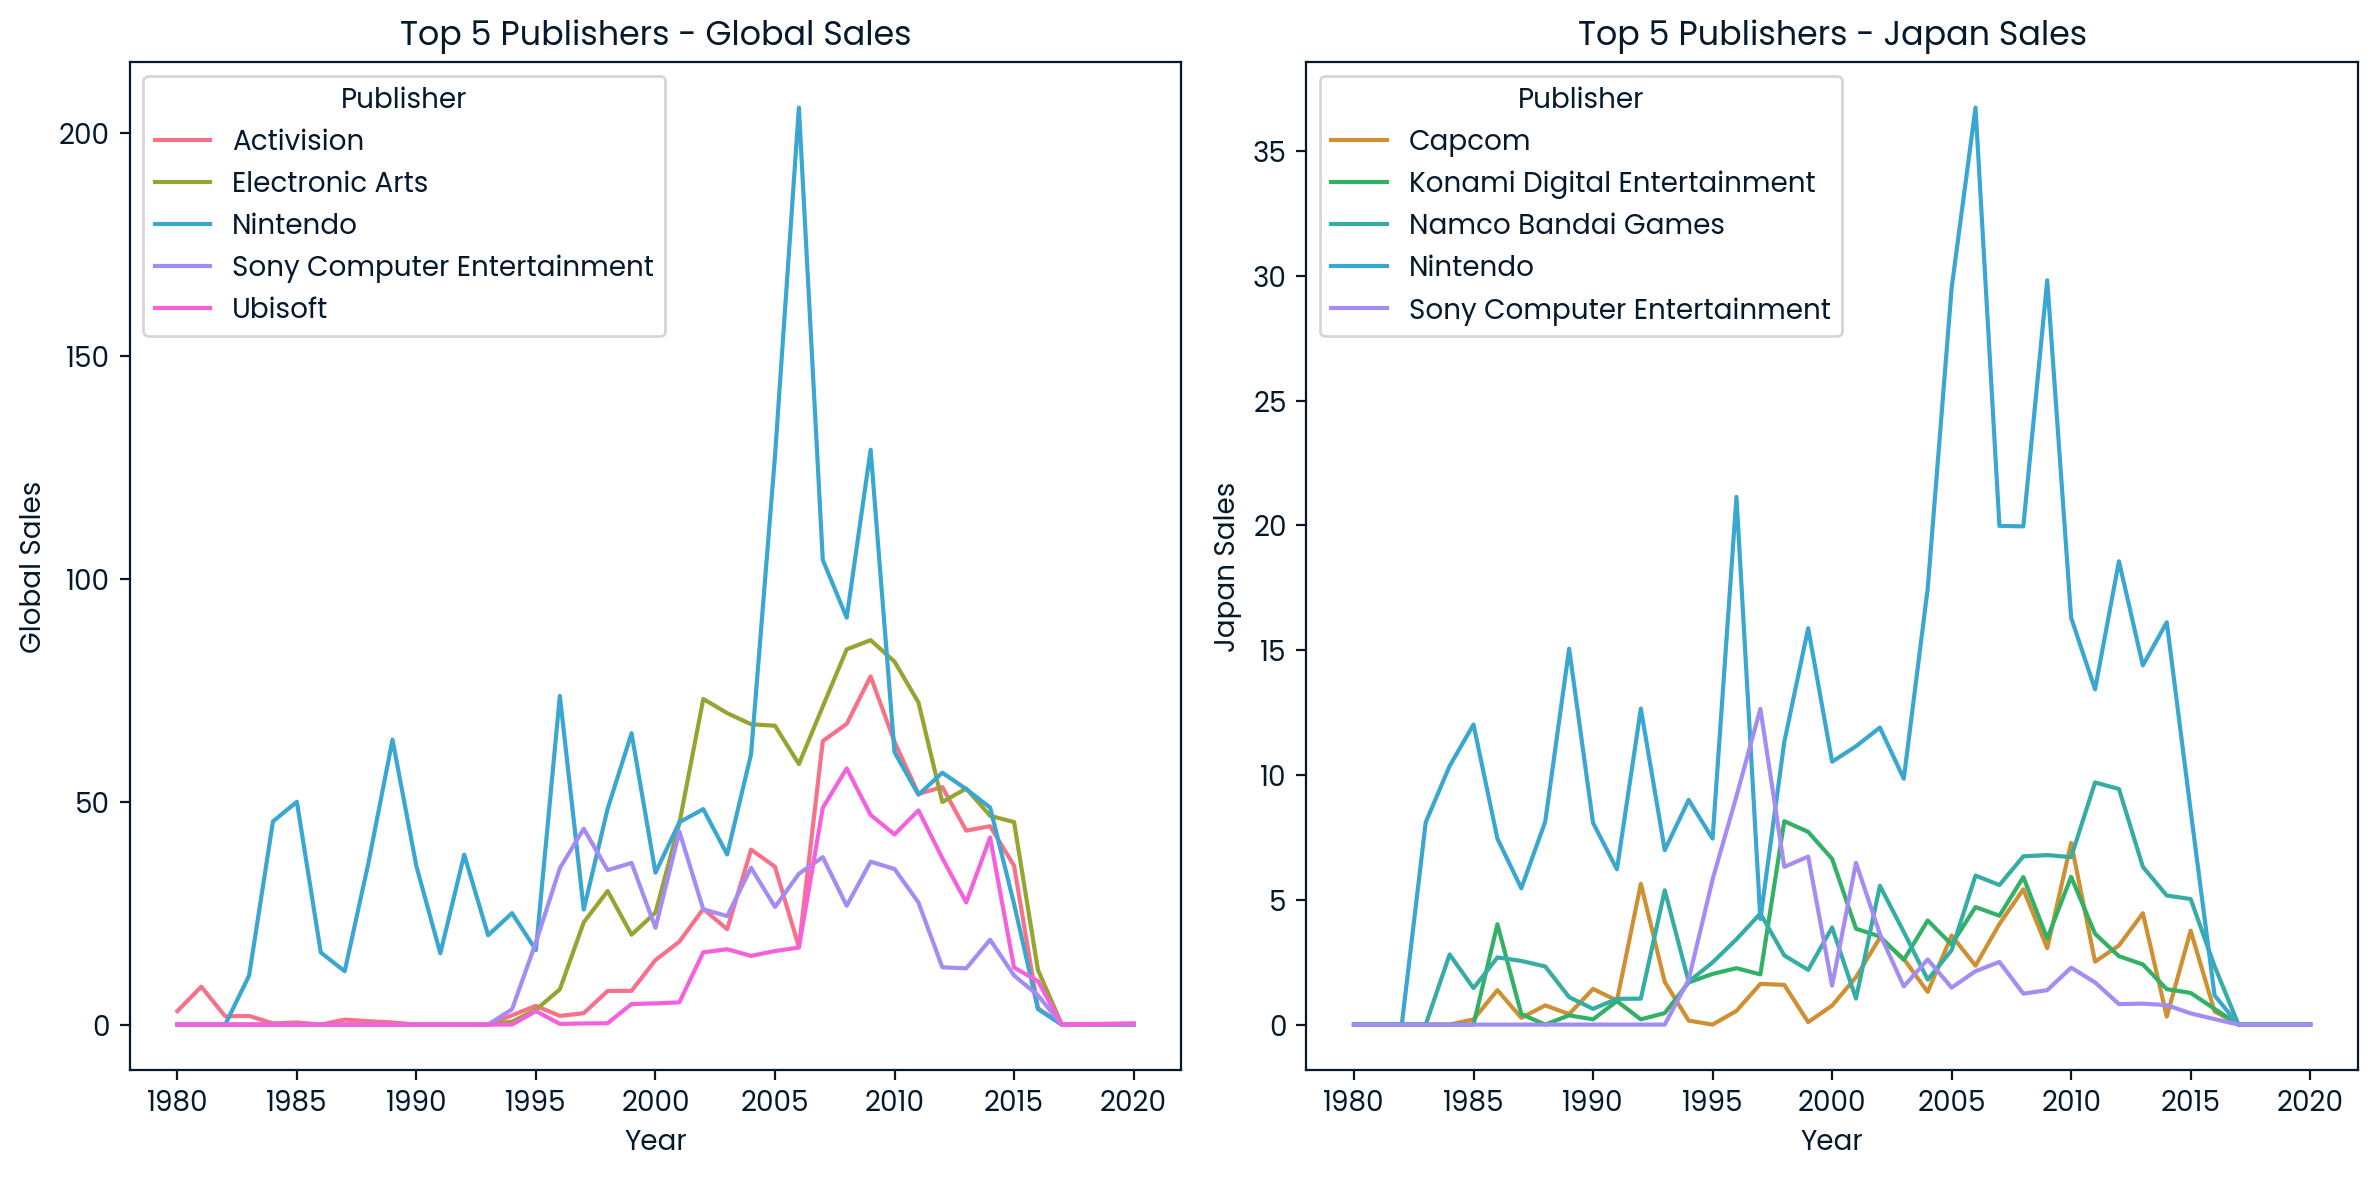

In [25]:
# Group the data by Publisher and Year, and calculate the sum of Global Sales and Japan Sales
sales_by_publisher_year = vgsales.groupby(['Publisher', 'Year']).agg({'Global_Sales': 'sum', 'JP_Sales': 'sum'}).reset_index()

# Get the top 5 publishers by Global Sales
top5_publishers_global = sales_by_publisher_year.groupby('Publisher')['Global_Sales'].sum().nlargest(5).index

# Get the top 5 publishers by Japan Sales
top5_publishers_japan = sales_by_publisher_year.groupby('Publisher')['JP_Sales'].sum().nlargest(5).index

# Combine the top publishers and create a unique list
unique_publishers = top5_publishers_global.union(top5_publishers_japan)

# Create a custom color palette
palette = sns.color_palette("husl", len(unique_publishers))
color_map = dict(zip(unique_publishers, palette))

# Filter the data for the top 5 publishers by Global Sales and Japan Sales
filtered_sales_global = sales_by_publisher_year[sales_by_publisher_year['Publisher'].isin(top5_publishers_global)]
filtered_sales_japan = sales_by_publisher_year[sales_by_publisher_year['Publisher'].isin(top5_publishers_japan)]

# Remove unused categories from the 'Publisher' column in the filtered DataFrames
filtered_sales_global['Publisher'] = filtered_sales_global['Publisher'].cat.remove_unused_categories()
filtered_sales_japan['Publisher'] = filtered_sales_japan['Publisher'].cat.remove_unused_categories()

# Create line plots for Global Sales and Japan Sales with custom color palette
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.lineplot(data=filtered_sales_global, x='Year', y='Global_Sales', hue='Publisher', palette=color_map, ax=ax1)
sns.lineplot(data=filtered_sales_japan, x='Year', y='JP_Sales', hue='Publisher', palette=color_map, ax=ax2)

ax1.set_title('Top 5 Publishers - Global Sales')
ax2.set_title('Top 5 Publishers - Japan Sales')
ax1.set_ylabel('Global Sales')
ax2.set_ylabel('Japan Sales')

plt.tight_layout()
plt.show()


As expected, Global Sales have diverse actors, while Japan Sales are led entirely by companies based in Japan.

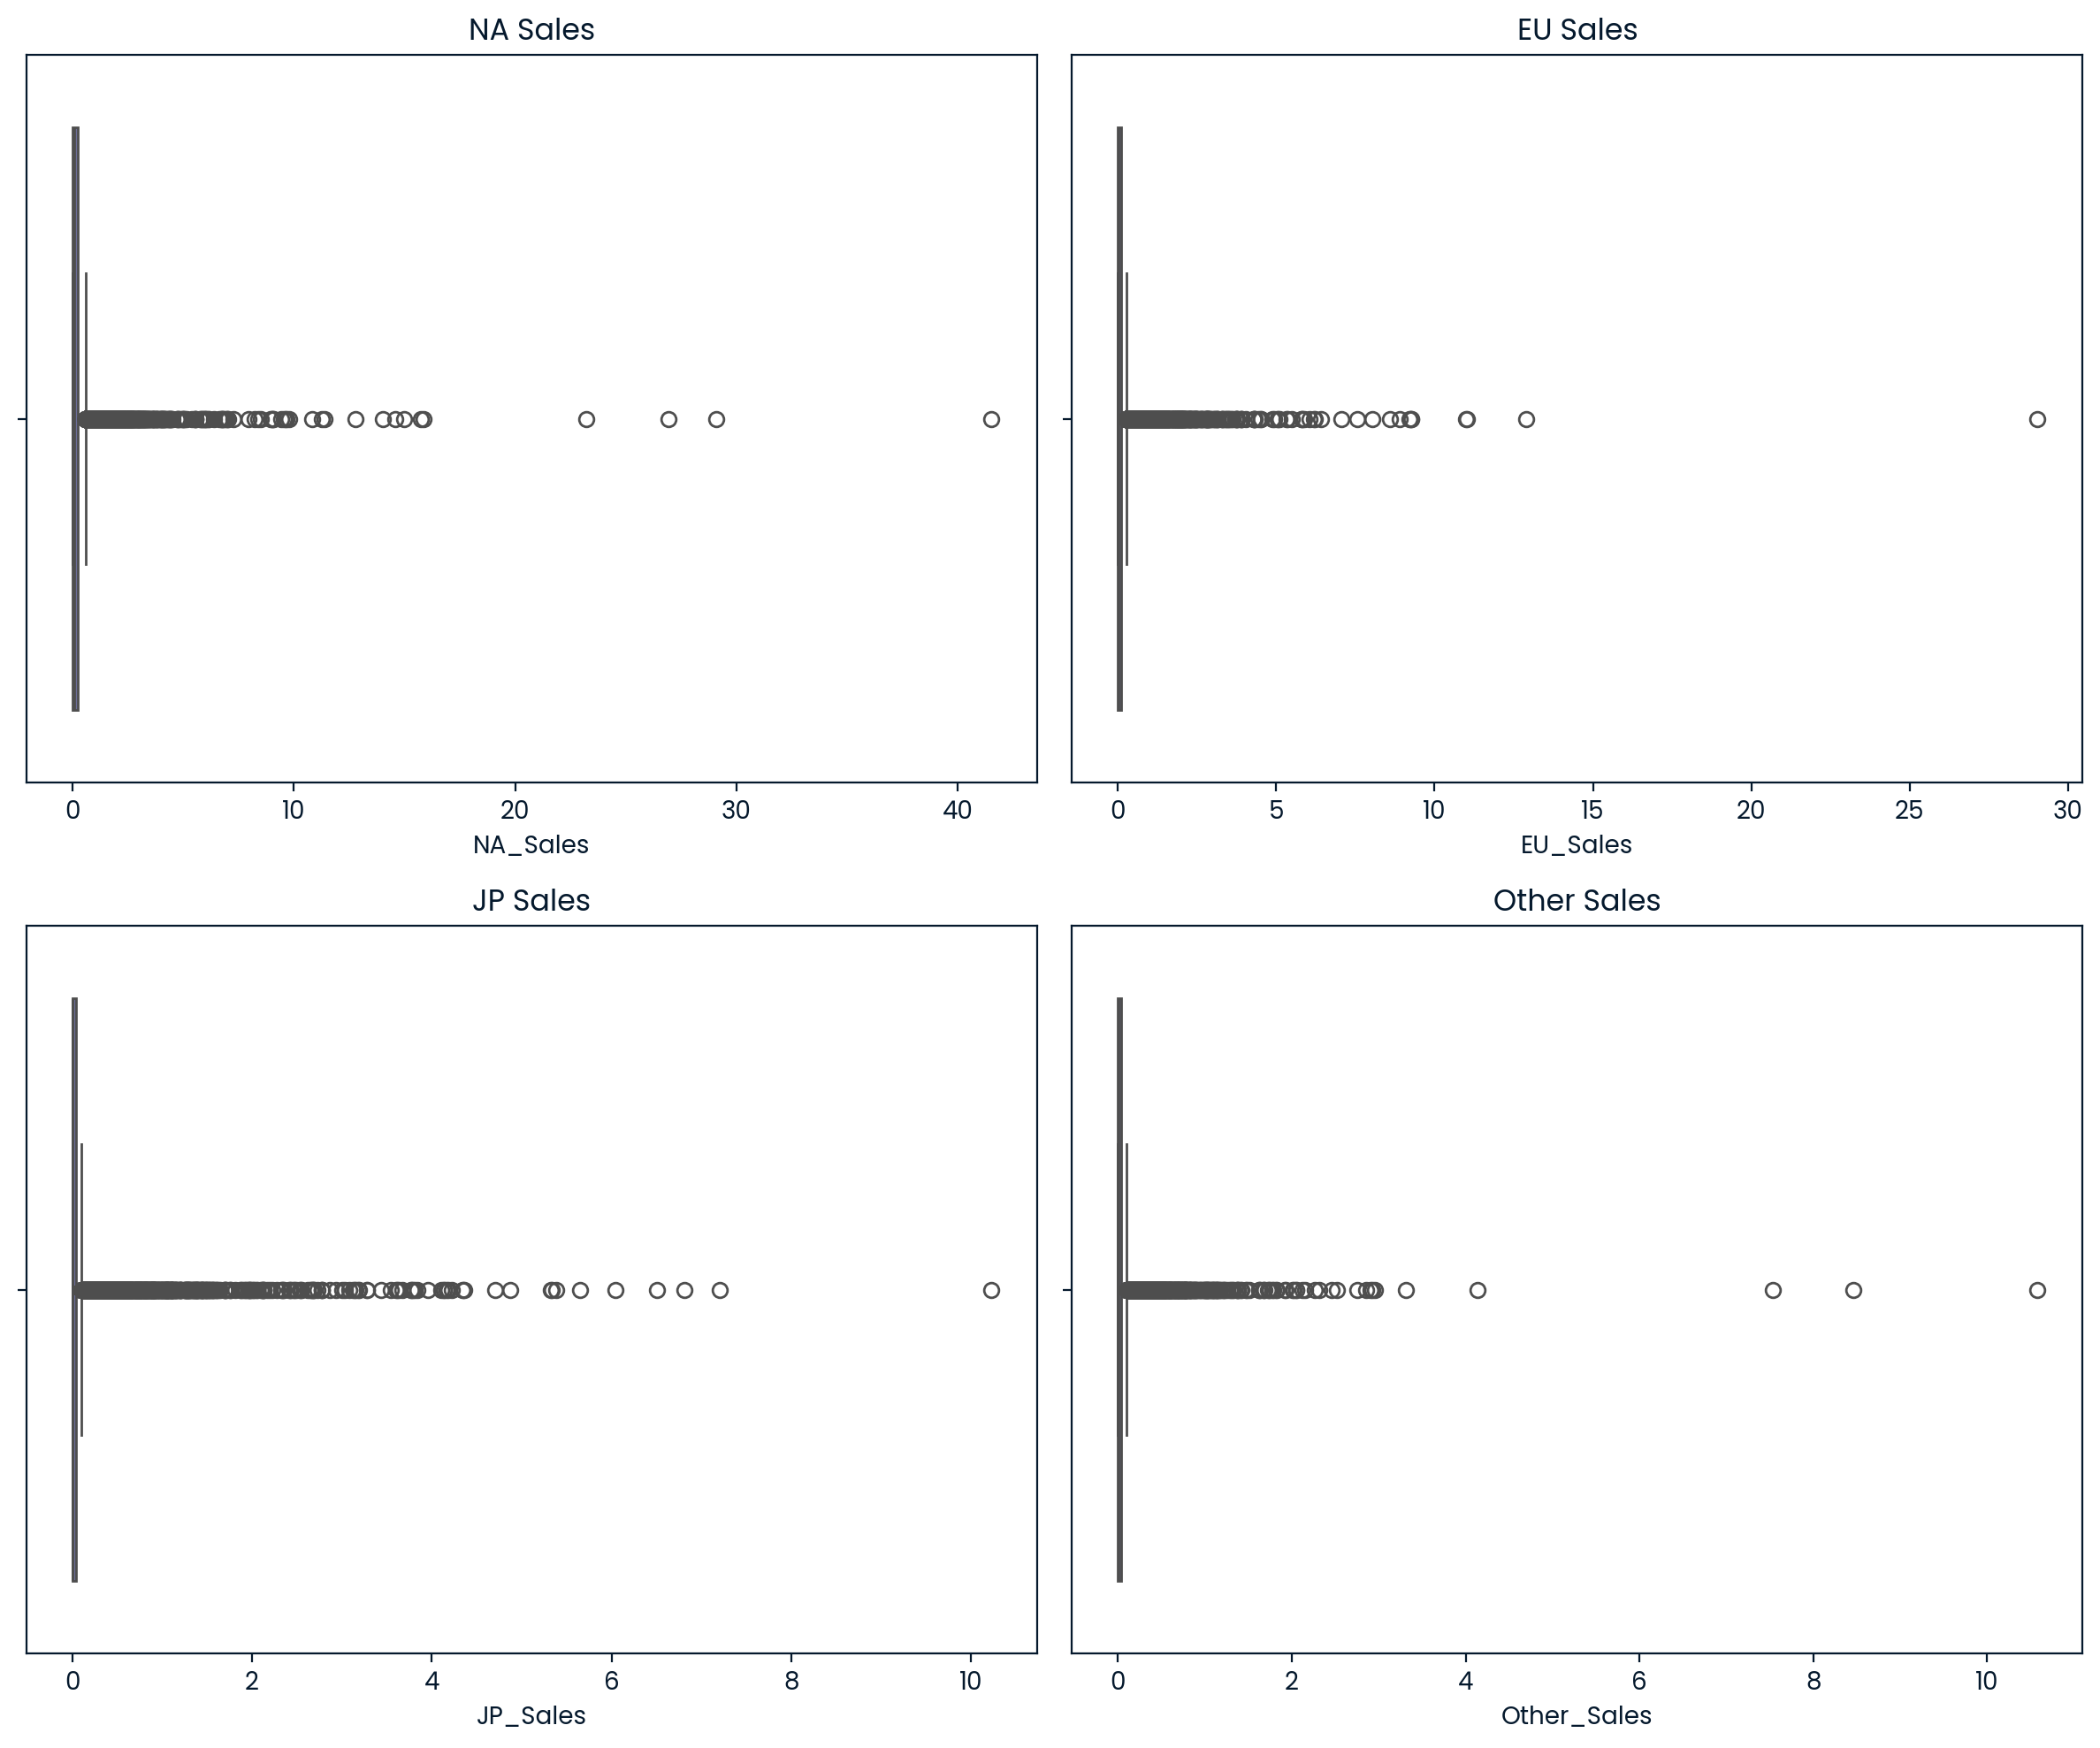

In [26]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot for NA_Sales
sns.boxplot(data=vgsales, x='NA_Sales', ax=axes[0, 0])
axes[0, 0].set_title('NA Sales')

# Boxplot for EU_Sales
sns.boxplot(data=vgsales, x='EU_Sales', ax=axes[0, 1])
axes[0, 1].set_title('EU Sales')

# Boxplot for JP_Sales
sns.boxplot(data=vgsales, x='JP_Sales', ax=axes[1, 0])
axes[1, 0].set_title('JP Sales')

# Boxplot for Other_Sales
sns.boxplot(data=vgsales, x='Other_Sales', ax=axes[1, 1])
axes[1, 1].set_title('Other Sales')

# Adjust layout for a better fit
plt.tight_layout()
plt.show()

In [27]:
# Top3 NA_Sales
na_top3 = vgsales.nlargest(3, 'NA_Sales')

# Top3 EU_Sales
eu_top3 = vgsales.nlargest(3, 'EU_Sales')

# Top3 JP_Sales
jp_top3 = vgsales.nlargest(3, 'JP_Sales')

# Top3 Other_Sales
other_top3 = vgsales.nlargest(3, 'Other_Sales')

# Show results
print("Top 3 NA Sales:\n", na_top3)
print("\nTop 3 EU Sales:\n", eu_top3)
print("\nTop 3 JP Sales:\n", jp_top3)
print("\nTop 3 Other Sales:\n", other_top3)

Top 3 NA Sales:
                    Name Platform    Year     Genre Publisher  NA_Sales  \
Rank                                                                     
1            Wii Sports      Wii  2006.0    Sports  Nintendo     41.49   
2     Super Mario Bros.      NES  1985.0  Platform  Nintendo     29.08   
10            Duck Hunt      NES  1984.0   Shooter  Nintendo     26.93   

      EU_Sales  JP_Sales  Other_Sales  Global_Sales  
Rank                                                 
1        29.02      3.77         8.46         82.74  
2         3.58      6.81         0.77         40.24  
10        0.63      0.28         0.47         28.31  

Top 3 EU Sales:
                    Name Platform    Year   Genre Publisher  NA_Sales  \
Rank                                                                   
1            Wii Sports      Wii  2006.0  Sports  Nintendo     41.49   
3        Mario Kart Wii      Wii  2008.0  Racing  Nintendo     15.85   
4     Wii Sports Resort      Wii  20

## Conclusions:

**As anticipated, there is a relationship between sales in Japan and sales in NA and EU, but from the analysis, it can be observed that other factors have an effect on sales since Japanese preferences do not follow the pattern of the others. This includes the preference for local Publishers (which could be due to more aggressive marketing campaigns or even the ability to tailor planning phase releases to the Japanese market; however, we do not have data to analyze that here). Similarly, the differing popularity of consoles and even the types of genres that sell the most break completely from the global pattern.** 

# Modeling

After completing the analysis, we will proceed with modeling. First, the selection of features: I will exclude Global_Sales since it includes Japan_Sales and is the feature to predict. Then, I will perform normalization of the numerical features. After that, I will handle the categorical features (which are not ordinal). I will split the data into a training set and a test set, and then I will proceed to use three models due to the nature of the feature. I will evaluate which one provides a better fit: linear regression and random forest.

**Notes**

- The most challenging part when dealing with features will be regarding the categorical ones, as they can introduce high dimensionality. The Genre feature has 12 categories, Platform has 31 categories, and Publisher has 572. For the first two, I will use one-hot encoding, and for the last one, I will use Pareto 80/20 with one-hot encoding. To reduce the high dimensionality.

In [28]:
# Function to apply the logarithmic transformation
def log_transform(data, epsilon=0.01):
    """Apply a logarithmic transformation to the data.
    
    Args:
    data (pd.Series): Series of data to transform.
    epsilon (float): Small value to avoid log(0). Default is 0.01.
    
    Returns:
    pd.Series: Transformed data series.
    """
    return np.log(data + epsilon)

def plot_kde(data, title, subplot_position):
    """Generate a kdeplot graph with the mean line.
    
    Args:
    data (pd.Series): Series of data to plot.
    title (str): Title of the graph.
    subplot_position (tuple): Position of the subplot in format (row, column, index).
    """
    plt.subplot(*subplot_position)
    sns.kdeplot(data, shade=True)
    plt.axvline(data.mean(), color='red', linestyle='--', label='Mean')
    plt.title(title)
    plt.xlabel('Log Sales')
    plt.ylabel('Density')
    plt.legend()

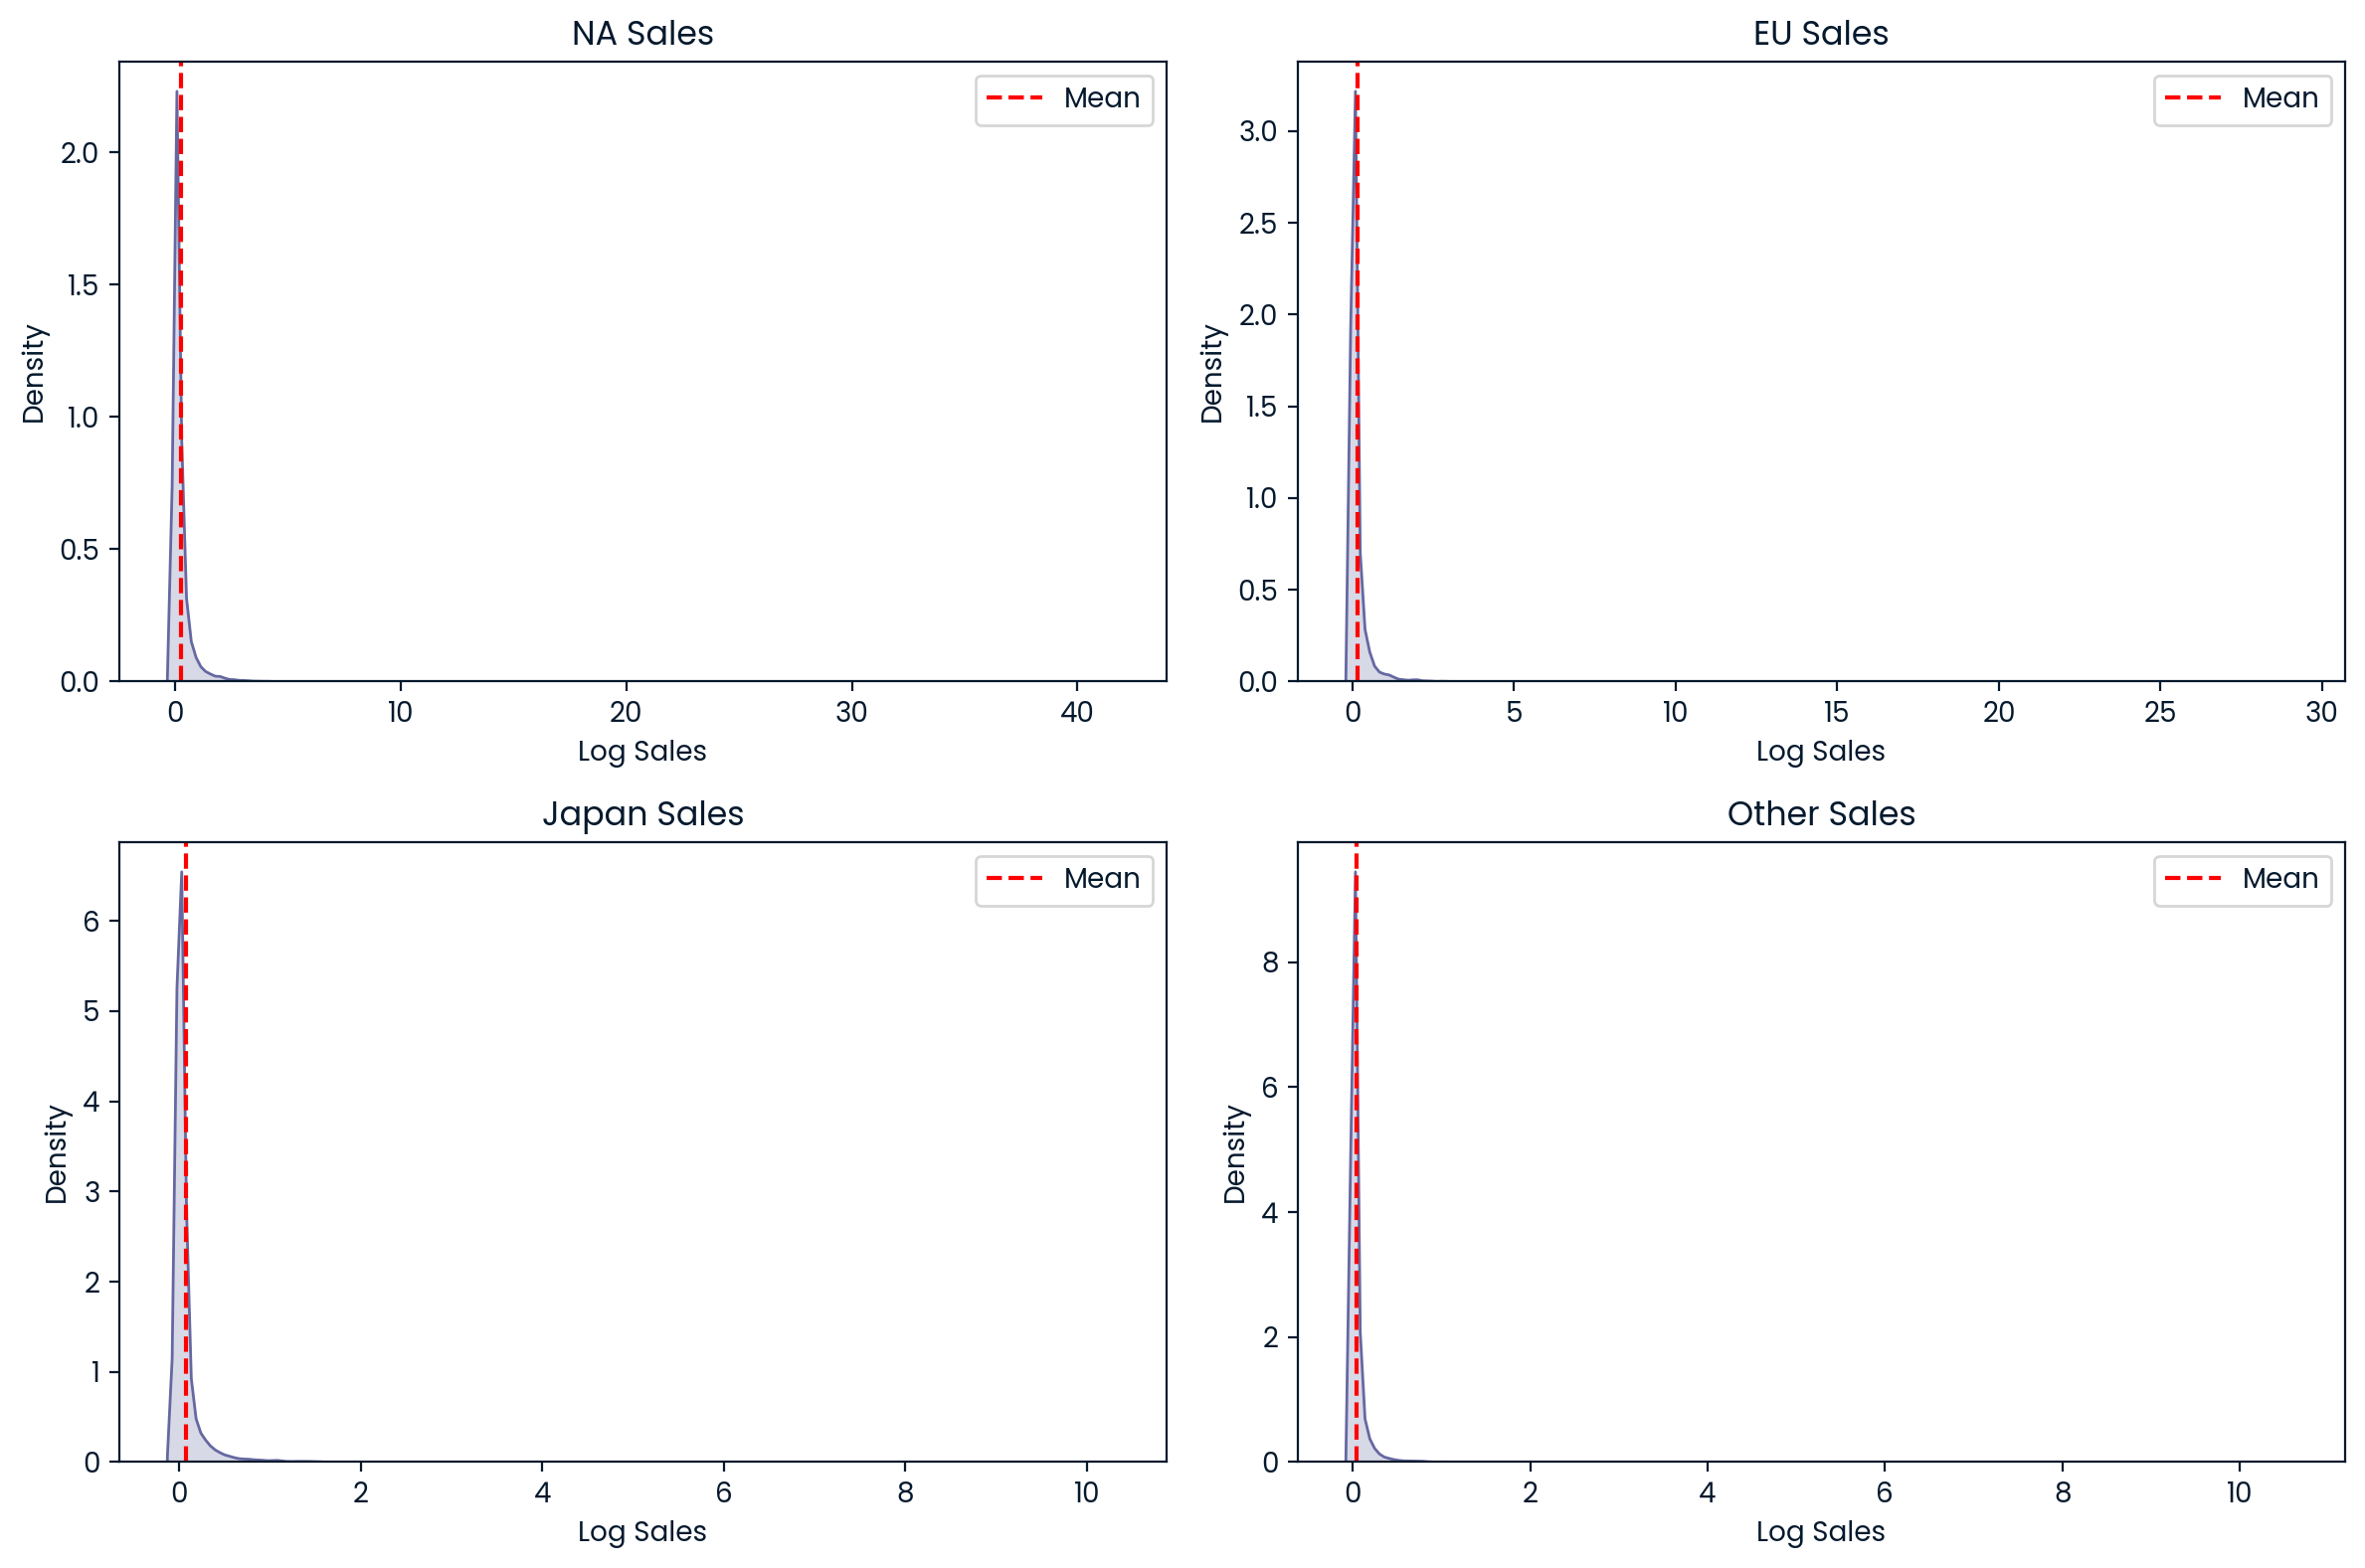

In [29]:
# Separate the data for each region
eu_sales = vgsales['EU_Sales']
na_sales = vgsales['NA_Sales']
jp_sales = vgsales['JP_Sales']
other_sales = vgsales['Other_Sales']

# Create a figure for the subplots
plt.figure(figsize=(12, 8))

# Generate kdeplot graphs for each region
plot_kde(na_sales, 'NA Sales', (2, 2, 1))
plot_kde(eu_sales, 'EU Sales', (2, 2, 2))
plot_kde(jp_sales, 'Japan Sales', (2, 2, 3))
plot_kde(other_sales, 'Other Sales', (2, 2, 4))

# Display the graphs
plt.tight_layout()
plt.show()



Assessing the data distribution and its mean, however, due to the skewed distribution, it's not easy to observe clearly, as there are titles that were extremely successful. Therefore, I will proceed to evaluate the distribution after scaling the data using a logarithmic transformation.

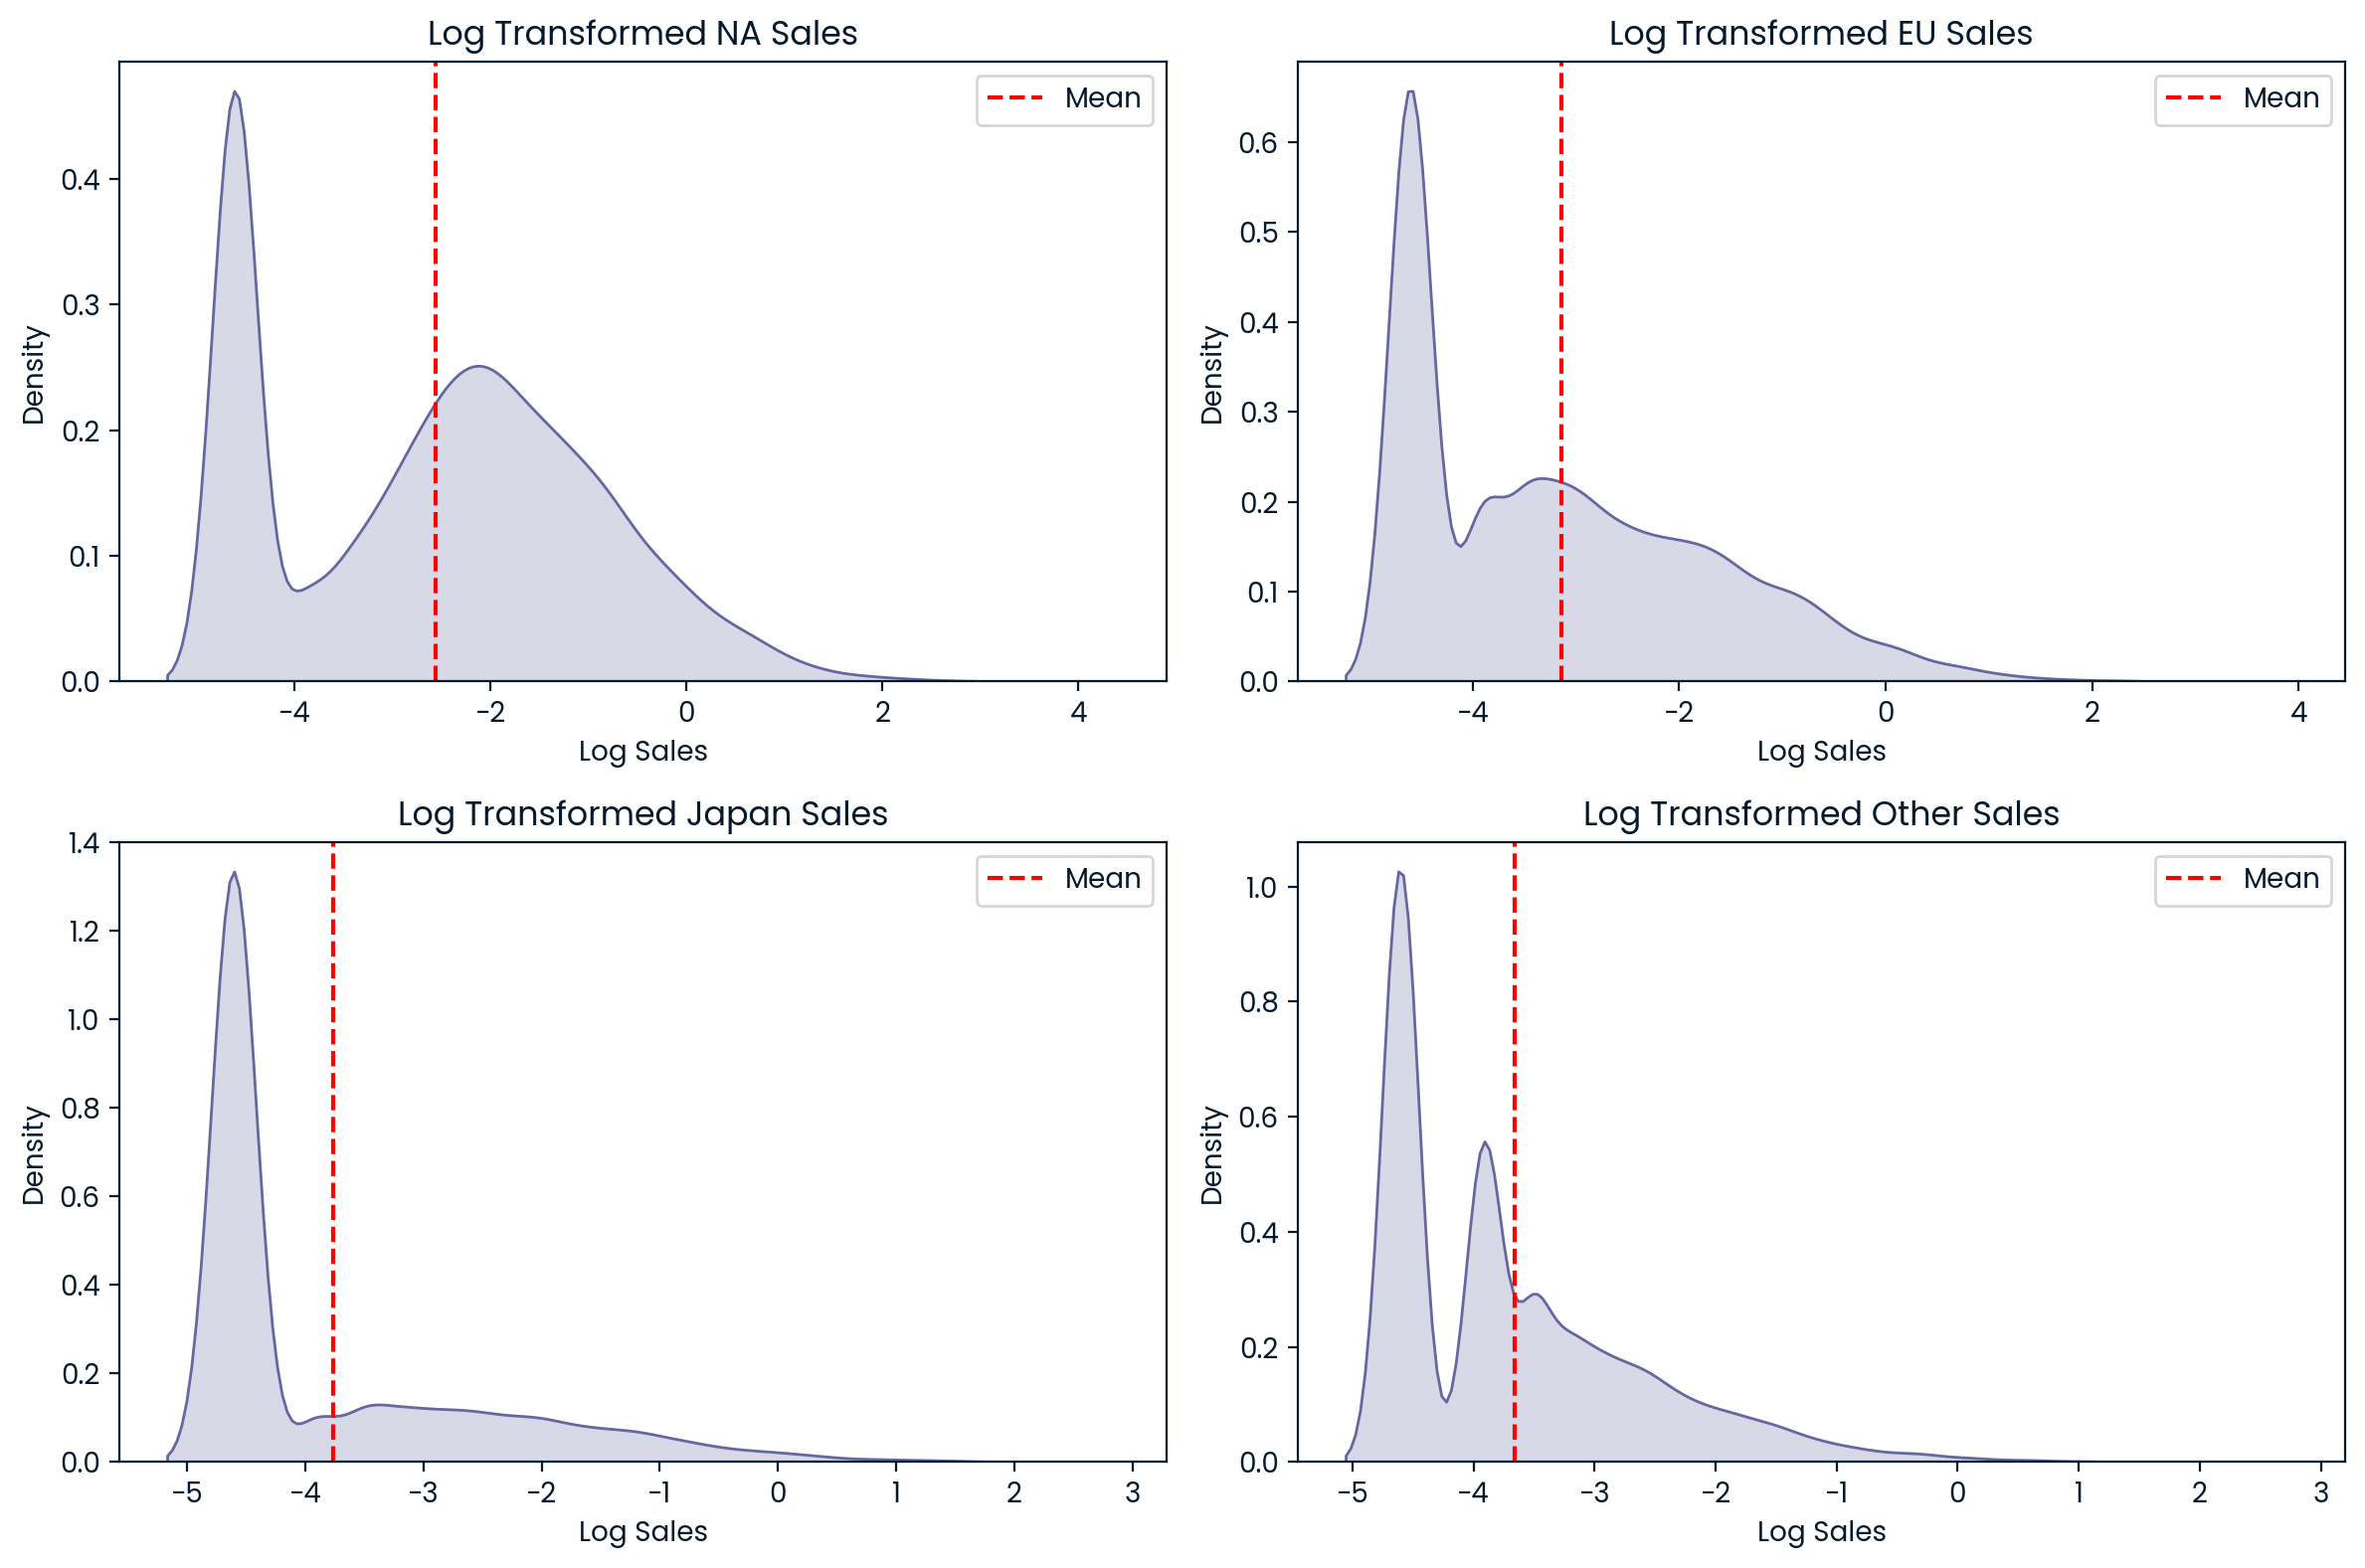

In [30]:
# Apply the logarithmic transformation
eu_sales_log = log_transform(eu_sales)
na_sales_log = log_transform(na_sales)
jp_sales_log = log_transform(jp_sales)
other_sales_log = log_transform(other_sales)

# Create a figure for the subplots
plt.figure(figsize=(12, 8))

# Generate kdeplot graphs for each region
plot_kde(na_sales_log, 'Log Transformed NA Sales', (2, 2, 1))
plot_kde(eu_sales_log, 'Log Transformed EU Sales', (2, 2, 2))
plot_kde(jp_sales_log, 'Log Transformed Japan Sales', (2, 2, 3))
plot_kde(other_sales_log, 'Log Transformed Other Sales', (2, 2, 4))

# Display the plots
plt.tight_layout()
plt.show()

Observing, as was expected from the previous graphs, it becomes evident that the data does not follow a normal distribution but rather a left-skewed distribution, even after scaling using a logarithmic transformation. Additionally, after evaluating the possible scaling methods to apply, I was deciding between using a _RobustScaler_ or a _LogTransform_. I will opt for the latter. While the outliers contain valuable information, I want to reduce the skew. Moreover, since the sales values are positive, applying a _LogTransform_ should not pose any issues. Additionally, before training the model, I will also apply normalization.

In [31]:
# Calculate the count for each publisher
publisher_counts = vgsales['Publisher'].value_counts()

# Calculate the cumulative sum of the counts
cumulative_sum = publisher_counts.cumsum()

# Calculate the total count of publishers
total_count = publisher_counts.sum()

# Find the index where the cumulative sum reaches 80% of the total count
index_80_percent = cumulative_sum[cumulative_sum <= 0.8 * total_count].index[-1]

# Filter the publishers that contribute to the top 80% of values
top_publishers = publisher_counts.loc[:index_80_percent]

# Count the number of categories
num_categories = len(top_publishers)

print(f'Number of publishers than group 80% of publications: {num_categories}')
print('Show top 10')
top_publishers[:10]


Number of publishers than group 80% of publications: 47
Show top 10


Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

It was evaluated using Pareto, and 47 publishers represent 80% of the releases (out of a total of 572 publishers). I will proceed to change the labels of those that are not in the top 80% to the category 'Others'.

In [32]:
# Create a new column 'Publisher_80' based on whether the publisher is in the top_publishers index
vgsales['Publisher_80'] = vgsales['Publisher'].apply(lambda x: x if x in top_publishers.index else 'Other')

In [33]:
vgsales.sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Publisher_80
Rank,,,,,,,,,,,
13380,Cocoto Kart Racer,DS,2004.0,Racing,Big Ben Interactive,0.04,0.00,0.00,0.00,0.05,Other
15334,The Awakened Fate Ultimatum,PS3,2014.0,Role-Playing,Nippon Ichi Software,0.00,0.00,0.02,0.00,0.02,Nippon Ichi Software
5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.00,0.00,0.34,Activision
4751,Mortal Kombat: Deadly Alliance,GC,2002.0,Fighting,Midway Games,0.31,0.08,0.00,0.01,0.41,Midway Games
11910,"Flower, Sun, and Rain",DS,2008.0,Adventure,Rising Star Games,0.07,0.00,0.00,0.01,0.07,Rising Star Games
16490,Slotter Mania P: Tetsuya Shinjuku vs Ueno,PSP,2010.0,Misc,Dorart,0.00,0.00,0.01,0.00,0.01,Other
7415,WCW Nitro,N64,1998.0,Fighting,THQ,0.17,0.04,0.00,0.00,0.21,THQ
6558,Peter Jackson's King Kong: The Official Game o...,X360,2005.0,Action,Ubisoft,0.20,0.03,0.00,0.02,0.26,Ubisoft
7703,Tiger Woods PGA Tour 06,PSP,2005.0,Sports,Electronic Arts,0.18,0.00,0.00,0.01,0.20,Electronic Arts


"I determine the following: the target, the numeric features (previously to apply log transform) to scale (I will not use Global_Sales to avoid multicollinearity), and the categorical features for one-hot encoding. Instead of Publisher (with 572 unique values), I will use Publisher_80 (with 48 unique values).
1. One-hot encoding
2. Split data
3. Scaling

In [34]:
vgsales.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Publisher_80'],
      dtype='object')

In [43]:
# Import modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

In [44]:
# Only with numeric features
target = vgsales['JP_Sales']

features_numeric = pd.concat((vgsales['Year'],na_sales,eu_sales,other_sales),axis=1)
X_train, X_test, y_train, y_test = train_test_split(features_numeric, target, test_size=0.2, random_state=42)

# Create an instance of MinMaxScaler for features
scaler_X_numeric = MinMaxScaler()

# Fit the scaler to the features and transform
X_train_scaled_numeric = scaler_X_numeric.fit_transform(X_train)
X_test_scaled_numeric = scaler_X_numeric.transform(X_test)

# Create an instance of MinMaxScaler for target
scaler_y = MinMaxScaler()

# Since the target is a single column, it needs to be reshaped for MinMaxScaler
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

print(features_numeric.shape, target.shape)

# Define a pipeline to search for the best combination of model preprocessing and model
pipe_numeric = Pipeline([
    ('model', LinearRegression())  # Placeholder for the model
])

# Define the model space
model_space_numeric = [
    {'model': [Lasso()], 'model__alpha': [0.01, 0.1, 1, 10, 100]},
    {'model': [Ridge()], 'model__alpha': [0.01, 0.1, 1, 10, 100]},
    {'model': [LinearRegression()]},
    {'model': [SVR()], 'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf']},
    {'model': [DecisionTreeRegressor()], 'model__max_depth': [None, 2, 5, 10, 20], 'model__min_samples_leaf': [1, 2, 5]}
]

# Create the GridSearchCV object
grid_search_numeric = GridSearchCV(pipe_numeric, model_space_numeric, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search_numeric.fit(X_train_scaled_numeric, y_train_scaled.ravel())

# Print the best parameters and the best model
print("Best parameters:", grid_search_numeric.best_params_)
print("Best model:", grid_search_numeric.best_estimator_)
best_model_score_numeric = grid_search_numeric.best_estimator_.score(X_test_scaled_numeric, y_test_scaled)
print(best_model_score_numeric)


(16290, 4) (16290,)
Best parameters: {'model': DecisionTreeRegressor(max_depth=10, min_samples_leaf=5), 'model__max_depth': 10, 'model__min_samples_leaf': 5}
Best model: Pipeline(steps=[('model',
                 DecisionTreeRegressor(max_depth=10, min_samples_leaf=5))])
0.21237749467493772


After testing the grid search using the 'Year' column, a score improvement of 0.02 was achieved when evaluating the best model.

In [45]:
# One-hot encoding
features_categoric_onethot = pd.get_dummies(vgsales[['Publisher_80']])
features_categoric_dummy = pd.get_dummies(vgsales[['Platform','Genre']], drop_first=True)
features_concat = pd.concat((features_numeric,features_categoric_dummy,features_categoric_onethot),axis=1)

print(features_concat.shape, target.shape)

# Split one-hot encoding data
X_train, X_test, y_train, y_test = train_test_split(features_concat, target, test_size=0.2, random_state=42)

# Create an instance of MinMaxScaler for features
scaler_X = MinMaxScaler()

# Fit the scaler to the features and transform
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Define a pipeline to search for the best combination of model preprocessing and model
pipe = Pipeline([
    ('model', LinearRegression())  # Placeholder for the model
])

# Define the model space
model_space_onehot = [
    {'model': [Lasso()], 'model__alpha': [0.01, 0.1, 1, 10, 100]},
    {'model': [Ridge()], 'model__alpha': [0.01, 0.1, 1, 10, 100]},
    {'model': [LinearRegression()]},
    {'model': [SVR()], 'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf']},
    {'model': [DecisionTreeRegressor()], 'model__max_depth': [None, 2, 5, 10, 20], 'model__min_samples_leaf': [1, 2, 5]}
]

# Create the GridSearchCV object
grid_search_onehot = GridSearchCV(pipe, model_space_onehot, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search_onehot.fit(X_train_scaled, y_train_scaled.ravel())

# Print the best parameters and the best model
print("Best parameters:", grid_search_onehot.best_params_)
print("Best model:", grid_search_onehot.best_estimator_)

# Print score best model with one-hot encoding
best_model_score_onehot = grid_search_onehot.best_estimator_.score(X_test_scaled, y_test_scaled)
print(best_model_score_onehot)

(16290, 93) (16290,)
Best parameters: {'model': DecisionTreeRegressor(max_depth=20, min_samples_leaf=5), 'model__max_depth': 20, 'model__min_samples_leaf': 5}
Best model: Pipeline(steps=[('model',
                 DecisionTreeRegressor(max_depth=20, min_samples_leaf=5))])
0.5251728435354333


Just like in the model with only numerical features, after trying without using the 'Year' column and using it, I obtained a better result using the 'Year' column.

Also, using the sales columns, I got a better result using the original columns as input data instead of the transformed ones with log_transform.

### Ramdom Forest Regressor

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define the parameter grid to use for the RandomizedSearch
param_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(3, 10),
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 11),
    "bootstrap": [True, False]
}

# Initialize the RandomForestRegressor
forest_reg = RandomForestRegressor()

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(forest_reg, param_distributions=param_dist, n_iter=10, cv=5, verbose=0, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train_scaled, y_train_scaled.ravel())

# Print the best parameters and the best model
print("Best Parameters:", random_search.best_params_)
print("Best Model:", random_search.best_estimator_)

# Print score best model with one-hot encoding
best_model_score_forest = random_search.best_estimator_.score(X_test_scaled, y_test_scaled)
print(best_model_score_forest)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'bootstrap': True, 'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 8, 'n_estimators': 373}
Best Model: RandomForestRegressor(max_depth=7, min_samples_leaf=9, min_samples_split=8,
                      n_estimators=373)
0.5803548410051431


### Gradient Boosting Regressor

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Create model Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Define hiperparams
param_grid_gradbost = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4]
}

# Apply GridSearchCV
gbr_grid = GridSearchCV(estimator=gbr, param_grid=param_grid_gradbost, cv=3, n_jobs=-1, verbose=0)
gbr_grid.fit(X_train_scaled, y_train_scaled.ravel())

# Print the best parameters and the best model
print("Best parameters:", gbr_grid.best_params_)
print("Best model:", gbr_grid.best_estimator_)

# Print score best model with one-hot encoding
best_model_score_gbr = gbr_grid.best_estimator_.score(X_test_scaled, y_test_scaled)
print(best_model_score_gbr)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best model: GradientBoostingRegressor(min_samples_leaf=2, n_estimators=300, random_state=42)
0.654891703409142


### XGBoosT

In [50]:
from xgboost import XGBRegressor

# Create model XGBoost Regressor
xgb = XGBRegressor(random_state=42)

# Define hiperparams
param_grid_xgb = {
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9]
}

# Apply GridSearchCV
xgb_grid = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=0)
xgb_grid.fit(X_train_scaled, y_train_scaled.ravel())

# Print the best parameters and the best model
print("Best parameters:", xgb_grid.best_params_)
print("Best model:", xgb_grid.best_estimator_)

# Print score best model with one-hot encoding
best_model_score_xgb = xgb_grid.best_estimator_.score(X_test_scaled, y_test_scaled)
print(best_model_score_xgb)


Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.7}
Best model: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)
0.6767811366374161


## Conclusions:

- After trying different machine learning models for regression, the best score (R^2) was obtained with the XGB Regressor, yielding a score of 0.6767
- Results were improved by including the 'Year' column.
- Applying log transform to the numerical features (the training data that included one-hot encoding) resulted in worse performance in the models, with the score being similar to using only the numerical features as training data (without the categorical features).
- Using only the numerical features led to lower performance in the model with a score of 0.2124.
- Including the categorical feature 'Publisher' improved the model, although to a minimal extent.

### Observations:
- I did not use the numerical feature 'Global Sales' because it represents the total sum of sales. Therefore, the model could be fitted with an R^2 above 99%, but this fit would not be very useful since 'Global_Sales' already includes 'JP_Sales' and cannot be calculated before 'JP_Sales' values are available. This would lead to a misleading perception of good model fit. 'Global_Sales' can be manually inferred by subtracting the sum of the other numerical sales features.
- Due to the high dimensionality that would be generated by the 'Publisher' feature, I decided to apply Pareto and classify the 20% grouping the fewest publications as 'Othe- 

### Recommendations:
- Change the encoding method for 'Publisher'. Instead of using Pareto 80-20 and one-hot encoding, consider using 'Frequency Encoding'. This approach may improve the model by incorporating more parameters, as the 'Publisher' grouped as 'Others' could provide more information to the model.